# Housing Assignment

## Problem Statement
* A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia.

* The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

* The company wants to know:

> 1. Which variables are significant in predicting the price of a house, and

> 2. How well those variables describe the price of a house.

## 1. Data understanding and Exploration

In [1]:
# Import required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn import linear_model, metrics
from sklearn.preprocessing import MinMaxScaler, scale
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
housing_df = pd.read_csv('train.csv')
housing_df.head(5)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [3]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
housing_df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [5]:
## pd.set_option('display.max_rows', None)
housing_df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [6]:
housing_df['MSSubClass'].value_counts()

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

### Converting the Categorical Variable MSSubClass from Int to Object dtype

In [7]:
housing_df['MSSubClass'] = housing_df['MSSubClass'].astype('object')

In [8]:
housing_df['MSSubClass'].head(5)

0    60
1    20
2    60
3    70
4    60
Name: MSSubClass, dtype: object

In [9]:
housing_df['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

###  Fixing MSZoning 'C (all)' value with C

In [10]:
housing_df['MSZoning'] = housing_df['MSZoning'].apply(lambda x: 'C' if x=='C (all)' else x)

In [11]:
housing_df['MSZoning'].value_counts()

RL    1151
RM     218
FV      65
RH      16
C       10
Name: MSZoning, dtype: int64

In [12]:
housing_df['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

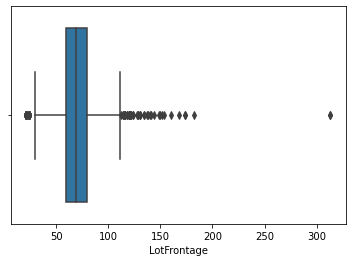

In [13]:
sns.boxplot(housing_df['LotFrontage'])
plt.show()

In [14]:
housing_df[(housing_df['LotFrontage'].isnull())]

Id MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
7        8         60       RL          NaN    10382   Pave   NaN      IR1   
12      13         20       RL          NaN    12968   Pave   NaN      IR2   
14      15         20       RL          NaN    10920   Pave   NaN      IR1   
16      17         20       RL          NaN    11241   Pave   NaN      IR1   
24      25         20       RL          NaN     8246   Pave   NaN      IR1   
...    ...        ...      ...          ...      ...    ...   ...      ...   
1429  1430         20       RL          NaN    12546   Pave   NaN      IR1   
1431  1432        120       RL          NaN     4928   Pave   NaN      IR1   
1441  1442        120       RM          NaN     4426   Pave   NaN      Reg   
1443  1444         30       RL          NaN     8854   Pave   NaN      Reg   
1446  1447         20       RL          NaN    26142   Pave   NaN      IR1   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
7            Lvl    AllPub  ...        0    NaN    NaN        Shed     350   
12           Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
14           Lvl    AllPub  ...        0    NaN   GdWo         NaN       0   
16           Lvl    AllPub  ...        0    NaN    NaN        Shed     700   
24           Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1429         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1431         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1441         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1443         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1446         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
7        11   2009        WD         Normal     200000  
12        9   2008        WD         Normal     144000  
14        5   2008        WD         Normal     157000  
16        3   2010        WD         Normal     149000  
24        5   2010        WD         Normal     154000  
...     ...    ...       ...            ...        ...  
1429      4   2007        WD         Normal     182900  
1431     10   2009        WD         Normal     143750  
1441      5   2008        WD         Normal     149300  
1443      5   2009        WD         Normal     121000  
1446      4   2010        WD         Normal     157900  

[259 rows x 81 columns]

### We are replacing the NA values of Lot Frontage variable with median 

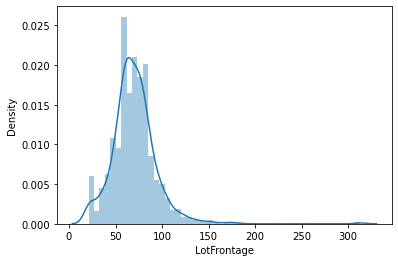

In [15]:
sns.distplot(housing_df['LotFrontage'])
plt.show()

In [16]:
housing_df['LotFrontage'] = housing_df['LotFrontage'].fillna(housing_df['LotFrontage'].median())

In [17]:
housing_df['LotFrontage'].isnull().sum()

0

In [18]:
housing_df['LotFrontage'].describe()

count    1460.000000
mean       69.863699
std        22.027677
min        21.000000
25%        60.000000
50%        69.000000
75%        79.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [19]:
housing_df['LotArea'].describe()

count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64

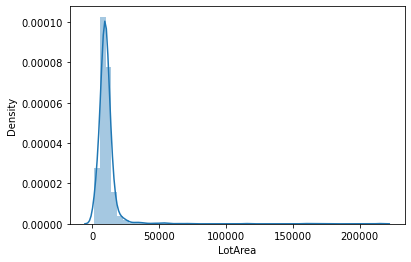

In [20]:
sns.distplot(housing_df['LotArea'])
plt.show()

In [21]:
LotArea_iqr = housing_df.LotArea.quantile(0.75) - housing_df.LotArea.quantile(0.25)
print(LotArea_iqr)
LotArea_upper_fence_limit = (housing_df.LotArea.quantile(0.75)+ 1.5 * LotArea_iqr)
LotArea_lower_fence_limit = (housing_df.LotArea.quantile(0.25) - 1.5 * LotArea_iqr)
print(LotArea_upper_fence_limit, LotArea_lower_fence_limit)

4048.0
17673.5 1481.5


In [22]:
housing_df[housing_df['LotArea']>17674].shape

(67, 81)

### Mean is skewed due to the outliers. So we are dropping Outlier LotArea rows from the dataset

In [23]:
housing_df = housing_df[~(housing_df['LotArea']>17674)]

In [24]:
housing_df.shape

(1393, 81)

In [25]:
housing_df['LotArea'].describe()

count     1393.000000
mean      9261.217516
std       3208.365020
min       1300.000000
25%       7420.000000
50%       9262.000000
75%      11228.000000
max      17671.000000
Name: LotArea, dtype: float64

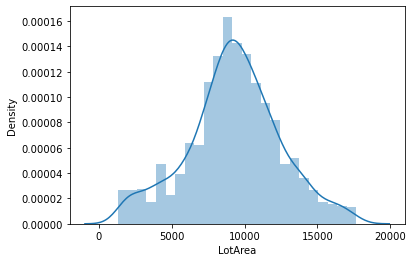

In [26]:
sns.distplot(housing_df['LotArea'])
plt.show()

In [27]:
housing_df['LotFrontage'].describe()

count    1393.000000
mean       68.789663
std        19.119470
min        21.000000
25%        60.000000
50%        69.000000
75%        78.000000
max       182.000000
Name: LotFrontage, dtype: float64

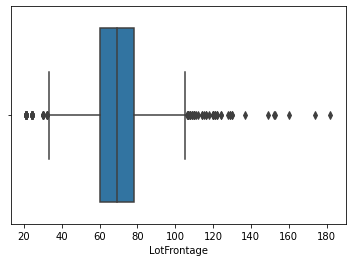

In [28]:
sns.boxplot(housing_df['LotFrontage'])
plt.show()

In [29]:
housing_df['Alley'].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [30]:
housing_df['Alley'].isna().sum()

1302

#### Since NA of Alley Variable specifies No alley Access, we are replacing NA with No Alley Access

In [31]:
housing_df['Alley'] = housing_df['Alley'].fillna('No Alley Access')

In [32]:
housing_df['Alley'].value_counts()

No Alley Access    1302
Grvl                 50
Pave                 41
Name: Alley, dtype: int64

In [33]:
housing_df['Street'].value_counts()

Pave    1390
Grvl       3
Name: Street, dtype: int64

In [34]:
housing_df['MasVnrType'].value_counts()

None       824
BrkFace    427
Stone      123
BrkCmn      12
Name: MasVnrType, dtype: int64

In [35]:
housing_df[housing_df['MasVnrType'].isnull()].MasVnrType

234     NaN
650     NaN
936     NaN
973     NaN
977     NaN
1243    NaN
1278    NaN
Name: MasVnrType, dtype: object

In [36]:
housing_df = housing_df[~(housing_df['MasVnrType'].isnull())]

In [37]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1386 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1386 non-null   int64  
 1   MSSubClass     1386 non-null   object 
 2   MSZoning       1386 non-null   object 
 3   LotFrontage    1386 non-null   float64
 4   LotArea        1386 non-null   int64  
 5   Street         1386 non-null   object 
 6   Alley          1386 non-null   object 
 7   LotShape       1386 non-null   object 
 8   LandContour    1386 non-null   object 
 9   Utilities      1386 non-null   object 
 10  LotConfig      1386 non-null   object 
 11  LandSlope      1386 non-null   object 
 12  Neighborhood   1386 non-null   object 
 13  Condition1     1386 non-null   object 
 14  Condition2     1386 non-null   object 
 15  BldgType       1386 non-null   object 
 16  HouseStyle     1386 non-null   object 
 17  OverallQual    1386 non-null   int64  
 18  OverallC

In [38]:
housing_df.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

In [39]:
# Converting 'OverallQual' variable datatype from Int to object

housing_df['OverallQual'] = housing_df['OverallQual'].astype('object')

In [40]:
housing_df['OverallQual'].value_counts()

5     378
6     357
7     299
8     163
4     112
9      41
3      19
10     12
2       3
1       2
Name: OverallQual, dtype: int64

In [41]:
# Converting 'OverallCond' variable datatype from Int to object since it is a categorical variable
housing_df['OverallCond'] = housing_df['OverallCond'].astype('object')

In [42]:
housing_df['OverallCond'].value_counts()

5    781
6    242
7    195
8     70
4     49
3     24
9     19
2      5
1      1
Name: OverallCond, dtype: int64

In [43]:
housing_df['YearBuilt'].value_counts()

2006    64
2005    60
2004    54
2007    46
2003    43
        ..
1898     1
1893     1
1892     1
1882     1
2010     1
Name: YearBuilt, Length: 112, dtype: int64

In [44]:
housing_df['YearBuilt'] = housing_df['YearBuilt'].apply(lambda x: datetime.strptime(str(x), '%Y').year)

In [45]:
housing_df['YearBuilt'].value_counts()

2006    64
2005    60
2004    54
2007    46
2003    43
        ..
1898     1
1893     1
1892     1
1882     1
2010     1
Name: YearBuilt, Length: 112, dtype: int64

In [46]:
housing_df['YearRemodAdd'].value_counts()

1950    172
2006     90
2007     71
2005     70
2004     61
       ... 
2010      6
1986      5
1983      5
1952      5
1951      3
Name: YearRemodAdd, Length: 61, dtype: int64

In [47]:
housing_df['YearRemodAdd'] = housing_df['YearRemodAdd'].apply(lambda x: datetime.strptime(str(x), '%Y').year)

In [48]:
housing_df[['YearBuilt','YearRemodAdd']].head(5)

YearBuilt  YearRemodAdd
0       2003          2003
1       1976          1976
2       2001          2002
3       1915          1970
4       2000          2000

In [49]:
housing_df['MasVnrArea'].describe()

count    1386.000000
mean      100.665224
std       173.247501
min         0.000000
25%         0.000000
50%         0.000000
75%       164.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [50]:
housing_df['BsmtQual'].isnull().sum()

36

### Since NA is value for No Basement in Basement quality. So replacing NA with No Basement

In [51]:
housing_df['BsmtQual'] = housing_df['BsmtQual'].fillna('No Basement')

In [52]:
housing_df['BsmtQual'].value_counts()

TA             619
Gd             584
Ex             112
No Basement     36
Fa              35
Name: BsmtQual, dtype: int64

### Similiarly  NA is the value for No Basement in Basement condition. So replacing NA with No Basement

In [53]:
housing_df['BsmtCond'] = housing_df['BsmtCond'].fillna('No Basement')

In [54]:
housing_df['BsmtCond'].value_counts()

TA             1244
Gd               59
Fa               45
No Basement      36
Po                2
Name: BsmtCond, dtype: int64

In [55]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1386 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1386 non-null   int64  
 1   MSSubClass     1386 non-null   object 
 2   MSZoning       1386 non-null   object 
 3   LotFrontage    1386 non-null   float64
 4   LotArea        1386 non-null   int64  
 5   Street         1386 non-null   object 
 6   Alley          1386 non-null   object 
 7   LotShape       1386 non-null   object 
 8   LandContour    1386 non-null   object 
 9   Utilities      1386 non-null   object 
 10  LotConfig      1386 non-null   object 
 11  LandSlope      1386 non-null   object 
 12  Neighborhood   1386 non-null   object 
 13  Condition1     1386 non-null   object 
 14  Condition2     1386 non-null   object 
 15  BldgType       1386 non-null   object 
 16  HouseStyle     1386 non-null   object 
 17  OverallQual    1386 non-null   object 
 18  OverallC

In [56]:
housing_df['BsmtExposure'].value_counts()

No    924
Av    213
Gd    107
Mn    105
Name: BsmtExposure, dtype: int64

In [57]:
housing_df['BsmtExposure'].isnull().sum()

37

In [58]:
housing_df[(housing_df['BsmtExposure'].isnull()) & (housing_df['BsmtCond']!='No Basement')][['BsmtExposure','BsmtCond']]

BsmtExposure BsmtCond
948          NaN       TA

#### Since in one variable Basment value is given and in one variable it mentioned as 'No Basement'. So we are dropping this row.

In [59]:
housing_df = housing_df[~((housing_df['BsmtExposure'].isnull()) & (housing_df['BsmtCond']!='No Basement'))]

In [60]:
housing_df['BsmtExposure'] = housing_df['BsmtExposure'].fillna('No Basement')

In [61]:
housing_df['BsmtExposure'].value_counts()

No             924
Av             213
Gd             107
Mn             105
No Basement     36
Name: BsmtExposure, dtype: int64

In [62]:
housing_df['BsmtFinType1'].value_counts()

Unf    412
GLQ    390
ALQ    211
BLQ    141
Rec    125
LwQ     70
Name: BsmtFinType1, dtype: int64

In [63]:
housing_df['BsmtFinType1'].isnull().sum()

36

In [64]:
housing_df['BsmtFinType2'].value_counts()

Unf    1196
Rec      46
LwQ      45
BLQ      31
ALQ      17
GLQ      13
Name: BsmtFinType2, dtype: int64

In [65]:
housing_df['BsmtFinType2'].isnull().sum()

37

In [66]:
housing_df['BsmtFinType1'] = housing_df['BsmtFinType1'].fillna('No Basement')

In [67]:
housing_df['BsmtFinType2'] = housing_df['BsmtFinType2'].fillna('No Basement')

In [68]:
housing_df['BsmtFinType1'].value_counts()

Unf            412
GLQ            390
ALQ            211
BLQ            141
Rec            125
LwQ             70
No Basement     36
Name: BsmtFinType1, dtype: int64

In [69]:
housing_df['BsmtFinType2'].value_counts()

Unf            1196
Rec              46
LwQ              45
No Basement      37
BLQ              31
ALQ              17
GLQ              13
Name: BsmtFinType2, dtype: int64

In [70]:
housing_df['Electrical'].value_counts()

SBrkr    1261
FuseA      92
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [71]:
housing_df['Electrical'].isnull().sum()

1

#### Filling NA value with mode for Electrical Variable

In [72]:
housing_df['Electrical'] = housing_df['Electrical'].fillna(housing_df['Electrical'].mode()[0])

In [73]:
housing_df['Electrical'].value_counts()

SBrkr    1262
FuseA      92
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [74]:
housing_df['1stFlrSF'].describe()

count    1385.000000
mean     1144.007942
std       363.185398
min       334.000000
25%       874.000000
50%      1074.000000
75%      1362.000000
max      3228.000000
Name: 1stFlrSF, dtype: float64

In [75]:
housing_df['2ndFlrSF'].describe()

count    1385.000000
mean      338.268592
std       425.941253
min         0.000000
25%         0.000000
50%         0.000000
75%       720.000000
max      2065.000000
Name: 2ndFlrSF, dtype: float64

In [76]:
housing_df[['LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr']].describe()

LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1385.000000  1385.000000   1385.000000   1385.000000  1385.000000   
mean       5.119134  1487.395668      0.412274      0.056318     1.554513   
std       44.597277   486.670411      0.508306      0.236801     0.541710   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1121.000000      0.000000      0.000000     1.000000   
50%        0.000000  1441.000000      0.000000      0.000000     2.000000   
75%        0.000000  1746.000000      1.000000      0.000000     2.000000   
max      528.000000  4476.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  
count  1385.000000   1385.000000   1385.000000  
mean      0.376895      2.858484      1.046931  
std       0.500910      0.806523      0.221577  
min       0.000000      0.000000      0.000000  
25%       0.000000      2.000000      1.000000  
50%       0.000000      3.000000      1.000000  
75%       1.000000      3.000000      1.000000  
max       2.000000      8.000000      3.000000

In [77]:
housing_df['FireplaceQu'].isnull().sum()

676

### Since NA is for No Fireplace we are replacing NA with No Fireplace

In [78]:
housing_df['FireplaceQu']=housing_df['FireplaceQu'].fillna('No Fireplace')

In [79]:
housing_df['FireplaceQu'].value_counts()

No Fireplace    676
Gd              350
TA              289
Fa               32
Po               19
Ex               19
Name: FireplaceQu, dtype: int64

In [80]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1385 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1385 non-null   int64  
 1   MSSubClass     1385 non-null   object 
 2   MSZoning       1385 non-null   object 
 3   LotFrontage    1385 non-null   float64
 4   LotArea        1385 non-null   int64  
 5   Street         1385 non-null   object 
 6   Alley          1385 non-null   object 
 7   LotShape       1385 non-null   object 
 8   LandContour    1385 non-null   object 
 9   Utilities      1385 non-null   object 
 10  LotConfig      1385 non-null   object 
 11  LandSlope      1385 non-null   object 
 12  Neighborhood   1385 non-null   object 
 13  Condition1     1385 non-null   object 
 14  Condition2     1385 non-null   object 
 15  BldgType       1385 non-null   object 
 16  HouseStyle     1385 non-null   object 
 17  OverallQual    1385 non-null   object 
 18  OverallC

In [81]:
housing_df['GarageType'].isnull().sum()

80

### NA is for No Garage in Garage Type

In [82]:
housing_df['GarageType'] = housing_df['GarageType'].fillna('No Garage')

In [83]:
housing_df['GarageYrBlt'].value_counts()

2005.0    63
2006.0    55
2004.0    53
2003.0    47
2007.0    44
          ..
1929.0     2
1933.0     1
1900.0     1
1906.0     1
1927.0     1
Name: GarageYrBlt, Length: 95, dtype: int64

In [84]:
housing_df['GarageYrBlt'].isnull().sum()

80

#### Garage Built year is not available since the preoperty doesn't have the Garage.So we are replace it with 'No Garage'

In [85]:
housing_df['GarageYrBlt']= housing_df['GarageYrBlt'].fillna('No Garage')

In [86]:
housing_df['GarageYrBlt'].apply(lambda x: datetime.strptime(str(int(x)), '%Y').year if (x!='No Garage') else x)

0       2003
1       1976
2       2001
3       1998
4       2000
        ... 
1455    1999
1456    1978
1457    1941
1458    1950
1459    1965
Name: GarageYrBlt, Length: 1385, dtype: object

#### We are creating new column for No of years since the garage built. So that GarageYrBlt variable can be removed

In [87]:
housing_df['Year_since_garageBlt'] = housing_df['GarageYrBlt'].apply(lambda x: (datetime.today().year - x) if x!='No Garage' else 0)

In [88]:
## So now we can drop GarageYrBlt Variable
housing_df = housing_df.drop(['GarageYrBlt'], axis=1)

In [89]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1385 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Id                    1385 non-null   int64  
 1   MSSubClass            1385 non-null   object 
 2   MSZoning              1385 non-null   object 
 3   LotFrontage           1385 non-null   float64
 4   LotArea               1385 non-null   int64  
 5   Street                1385 non-null   object 
 6   Alley                 1385 non-null   object 
 7   LotShape              1385 non-null   object 
 8   LandContour           1385 non-null   object 
 9   Utilities             1385 non-null   object 
 10  LotConfig             1385 non-null   object 
 11  LandSlope             1385 non-null   object 
 12  Neighborhood          1385 non-null   object 
 13  Condition1            1385 non-null   object 
 14  Condition2            1385 non-null   object 
 15  BldgType             

In [90]:
housing_df['GarageFinish'].value_counts()

Unf    579
RFn    403
Fin    323
Name: GarageFinish, dtype: int64

In [91]:
housing_df['GarageFinish'].isnull().sum()

80

In [92]:
housing_df['GarageFinish'] = housing_df['GarageFinish'].fillna('No Garage')

In [93]:
housing_df['GarageFinish'].value_counts()

Unf          579
RFn          403
Fin          323
No Garage     80
Name: GarageFinish, dtype: int64

In [94]:
housing_df['GarageCars'].value_counts()

2    769
1    365
3    167
0     80
4      4
Name: GarageCars, dtype: int64

In [95]:
housing_df['GarageArea'].describe()

count    1385.000000
mean      466.155235
std       210.382874
min         0.000000
25%       312.000000
50%       474.000000
75%       576.000000
max      1390.000000
Name: GarageArea, dtype: float64

In [96]:
housing_df['GarageQual'] = housing_df['GarageQual'].fillna('No Garage')

In [97]:
housing_df['GarageCond'] = housing_df['GarageCond'].fillna('No Garage')

In [98]:
housing_df['PoolQC'] = housing_df['PoolQC'].fillna('No Pool')

In [99]:
housing_df['Fence'] = housing_df['Fence'].fillna('No Fence')

In [100]:
housing_df['MiscFeature'] = housing_df['MiscFeature'].fillna('None')

In [101]:
housing_df['MiscVal'].describe()

count     1385.000000
mean        38.580505
std        457.651397
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      15500.000000
Name: MiscVal, dtype: float64

In [102]:
housing_df['MoSold'] = housing_df['MoSold'].apply(lambda x: (datetime.strptime(str(x), '%m')).month).astype('object')

In [103]:
housing_df['MoSold'].value_counts()

6     237
7     227
5     197
4     136
8     113
3      99
10     86
11     72
9      60
12     56
1      52
2      50
Name: MoSold, dtype: int64

In [104]:
housing_df['YrSold'].value_counts()

2009    326
2007    312
2006    293
2008    288
2010    166
Name: YrSold, dtype: int64

In [105]:
housing_df['YrSold'] = housing_df['YrSold'].astype('object')

In [106]:
housing_df['SaleType'].value_counts()

WD       1204
New       113
COD        41
ConLD       8
ConLw       5
ConLI       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64

In [107]:
housing_df['SaleCondition'].value_counts()

Normal     1140
Partial     115
Abnorml      96
Family       20
Alloca       10
AdjLand       4
Name: SaleCondition, dtype: int64

In [108]:
housing_df['SalePrice'].describe()

count      1385.000000
mean     177695.186282
std       75592.793041
min       34900.000000
25%      129000.000000
50%      160000.000000
75%      210000.000000
max      745000.000000
Name: SalePrice, dtype: float64

#### Creating New variable from YearBuilt and YearRemodAdd Datetime variable

In [109]:
housing_df['Years_since_Built'] = housing_df['YearBuilt'].apply(lambda x: (datetime.today().year - x))

In [110]:
housing_df['Years_since_Remodeled'] = housing_df['YearRemodAdd'].apply(lambda x: (datetime.today().year - x))

In [111]:
## Since we got the information from the year build and Year remodeled, we can drop those date variable
housing_df = housing_df.drop(['YearBuilt','YearRemodAdd'], axis=1)

In [112]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1385 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Id                     1385 non-null   int64  
 1   MSSubClass             1385 non-null   object 
 2   MSZoning               1385 non-null   object 
 3   LotFrontage            1385 non-null   float64
 4   LotArea                1385 non-null   int64  
 5   Street                 1385 non-null   object 
 6   Alley                  1385 non-null   object 
 7   LotShape               1385 non-null   object 
 8   LandContour            1385 non-null   object 
 9   Utilities              1385 non-null   object 
 10  LotConfig              1385 non-null   object 
 11  LandSlope              1385 non-null   object 
 12  Neighborhood           1385 non-null   object 
 13  Condition1             1385 non-null   object 
 14  Condition2             1385 non-null   object 
 15  Bldg

In [113]:
## Also we can drop ID variable since it is simply for the serial
housing_df = housing_df.drop(['Id'], axis=1)

In [114]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1385 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   MSSubClass             1385 non-null   object 
 1   MSZoning               1385 non-null   object 
 2   LotFrontage            1385 non-null   float64
 3   LotArea                1385 non-null   int64  
 4   Street                 1385 non-null   object 
 5   Alley                  1385 non-null   object 
 6   LotShape               1385 non-null   object 
 7   LandContour            1385 non-null   object 
 8   Utilities              1385 non-null   object 
 9   LotConfig              1385 non-null   object 
 10  LandSlope              1385 non-null   object 
 11  Neighborhood           1385 non-null   object 
 12  Condition1             1385 non-null   object 
 13  Condition2             1385 non-null   object 
 14  BldgType               1385 non-null   object 
 15  Hous

In [115]:
pd.set_option('display.max_rows', None)
housing_df.isnull().sum()

MSSubClass               0
MSZoning                 0
LotFrontage              0
LotArea                  0
Street                   0
Alley                    0
LotShape                 0
LandContour              0
Utilities                0
LotConfig                0
LandSlope                0
Neighborhood             0
Condition1               0
Condition2               0
BldgType                 0
HouseStyle               0
OverallQual              0
OverallCond              0
RoofStyle                0
RoofMatl                 0
Exterior1st              0
Exterior2nd              0
MasVnrType               0
MasVnrArea               0
ExterQual                0
ExterCond                0
Foundation               0
BsmtQual                 0
BsmtCond                 0
BsmtExposure             0
BsmtFinType1             0
BsmtFinSF1               0
BsmtFinType2             0
BsmtFinSF2               0
BsmtUnfSF                0
TotalBsmtSF              0
Heating                  0
H

In [116]:
housing_df.describe()

LotFrontage       LotArea   MasVnrArea   BsmtFinSF1   BsmtFinSF2  \
count  1385.000000   1385.000000  1385.000000  1385.000000  1385.000000   
mean     68.769675   9257.425271   100.633935   429.024549    43.577617   
std      19.111241   3208.799077   173.306161   424.637471   153.750163   
min      21.000000   1300.000000     0.000000     0.000000     0.000000   
25%      60.000000   7415.000000     0.000000     0.000000     0.000000   
50%      69.000000   9250.000000     0.000000   378.000000     0.000000   
75%      78.000000  11218.000000   164.000000   697.000000     0.000000   
max     182.000000  17671.000000  1600.000000  2188.000000  1474.000000   

         BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF  ...  \
count  1385.000000  1385.000000  1385.000000  1385.000000   1385.000000  ...   
mean    567.748736  1040.350903  1144.007942   338.268592      5.119134  ...   
std     442.591903   410.142636   363.185398   425.941253     44.597277  ...   
min       0.000000     0.000000   334.000000     0.000000      0.000000  ...   
25%     225.000000   789.000000   874.000000     0.000000      0.000000  ...   
50%     479.000000   980.000000  1074.000000     0.000000      0.000000  ...   
75%     799.000000  1268.000000  1362.000000   720.000000      0.000000  ...   
max    2336.000000  3206.000000  3228.000000  2065.000000    528.000000  ...   

       OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch     PoolArea  \
count  1385.000000    1385.000000  1385.000000  1385.000000  1385.000000   
mean     44.745848      21.750181     3.038267    14.505415     1.659206   
std      63.221720      59.530506    28.139041    54.304138    30.944351   
min       0.000000       0.000000     0.000000     0.000000     0.000000   
25%       0.000000       0.000000     0.000000     0.000000     0.000000   
50%      24.000000       0.000000     0.000000     0.000000     0.000000   
75%      66.000000       0.000000     0.000000     0.000000     0.000000   
max     547.000000     386.000000   508.000000   480.000000   648.000000   

            MiscVal      SalePrice  Year_since_garageBlt  Years_since_Built  \
count   1385.000000    1385.000000           1385.000000        1385.000000   
mean      38.580505  177695.186282             40.862094          50.626715   
std      457.651397   75592.793041             26.047126          30.264561   
min        0.000000   34900.000000              0.000000          12.000000   
25%        0.000000  129000.000000             18.000000          21.000000   
50%        0.000000  160000.000000             37.000000          49.000000   
75%        0.000000  210000.000000             60.000000          68.000000   
max    15500.000000  745000.000000            122.000000         150.000000   

       Years_since_Remodeled  
count            1385.000000  
mean               37.138628  
std                20.670960  
min                12.000000  
25%                18.000000  
50%                28.000000  
75%                55.000000  
max                72.000000  

[8 rows x 32 columns]

In [117]:
# creating dummy variables for categorical variables

# subset all categorical variables
housing_categorical = housing_df.select_dtypes(include=['object'])
housing_categorical.head()


MSSubClass MSZoning Street            Alley LotShape LandContour Utilities  \
0         60       RL   Pave  No Alley Access      Reg         Lvl    AllPub   
1         20       RL   Pave  No Alley Access      Reg         Lvl    AllPub   
2         60       RL   Pave  No Alley Access      IR1         Lvl    AllPub   
3         70       RL   Pave  No Alley Access      IR1         Lvl    AllPub   
4         60       RL   Pave  No Alley Access      IR1         Lvl    AllPub   

  LotConfig LandSlope Neighborhood  ... GarageQual GarageCond PavedDrive  \
0    Inside       Gtl      CollgCr  ...         TA         TA          Y   
1       FR2       Gtl      Veenker  ...         TA         TA          Y   
2    Inside       Gtl      CollgCr  ...         TA         TA          Y   
3    Corner       Gtl      Crawfor  ...         TA         TA          Y   
4       FR2       Gtl      NoRidge  ...         TA         TA          Y   

    PoolQC     Fence MiscFeature MoSold YrSold SaleType SaleCondition  
0  No Pool  No Fence        None      2   2008       WD        Normal  
1  No Pool  No Fence        None      5   2007       WD        Normal  
2  No Pool  No Fence        None      9   2008       WD        Normal  
3  No Pool  No Fence        None      2   2006       WD       Abnorml  
4  No Pool  No Fence        None     12   2008       WD        Normal  

[5 rows x 48 columns]

In [118]:
housing_categorical_lst = list(housing_categorical.columns)

In [119]:
# convert into dummies - one hot encoding
housing_dummies = pd.get_dummies(housing_categorical)
housing_dummies.head()

MSSubClass_20  MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  \
0              0              0              0              0              0   
1              1              0              0              0              0   
2              0              0              0              0              0   
3              0              0              0              0              0   
4              0              0              0              0              0   

   MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  \
0              1              0              0              0              0   
1              0              0              0              0              0   
2              1              0              0              0              0   
3              0              1              0              0              0   
4              1              0              0              0              0   

   ...  SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0  ...               0             0             0            1   
1  ...               0             0             0            1   
2  ...               0             0             0            1   
3  ...               0             0             0            1   
4  ...               0             0             0            1   

   SaleCondition_Abnorml  SaleCondition_AdjLand  SaleCondition_Alloca  \
0                      0                      0                     0   
1                      0                      0                     0   
2                      0                      0                     0   
3                      1                      0                     0   
4                      0                      0                     0   

   SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  
0                     0                     1                      0  
1                     0                     1                      0  
2                     0                     1                      0  
3                     0                     0                      0  
4                     0                     1                      0  

[5 rows x 311 columns]

## Visualising the Data

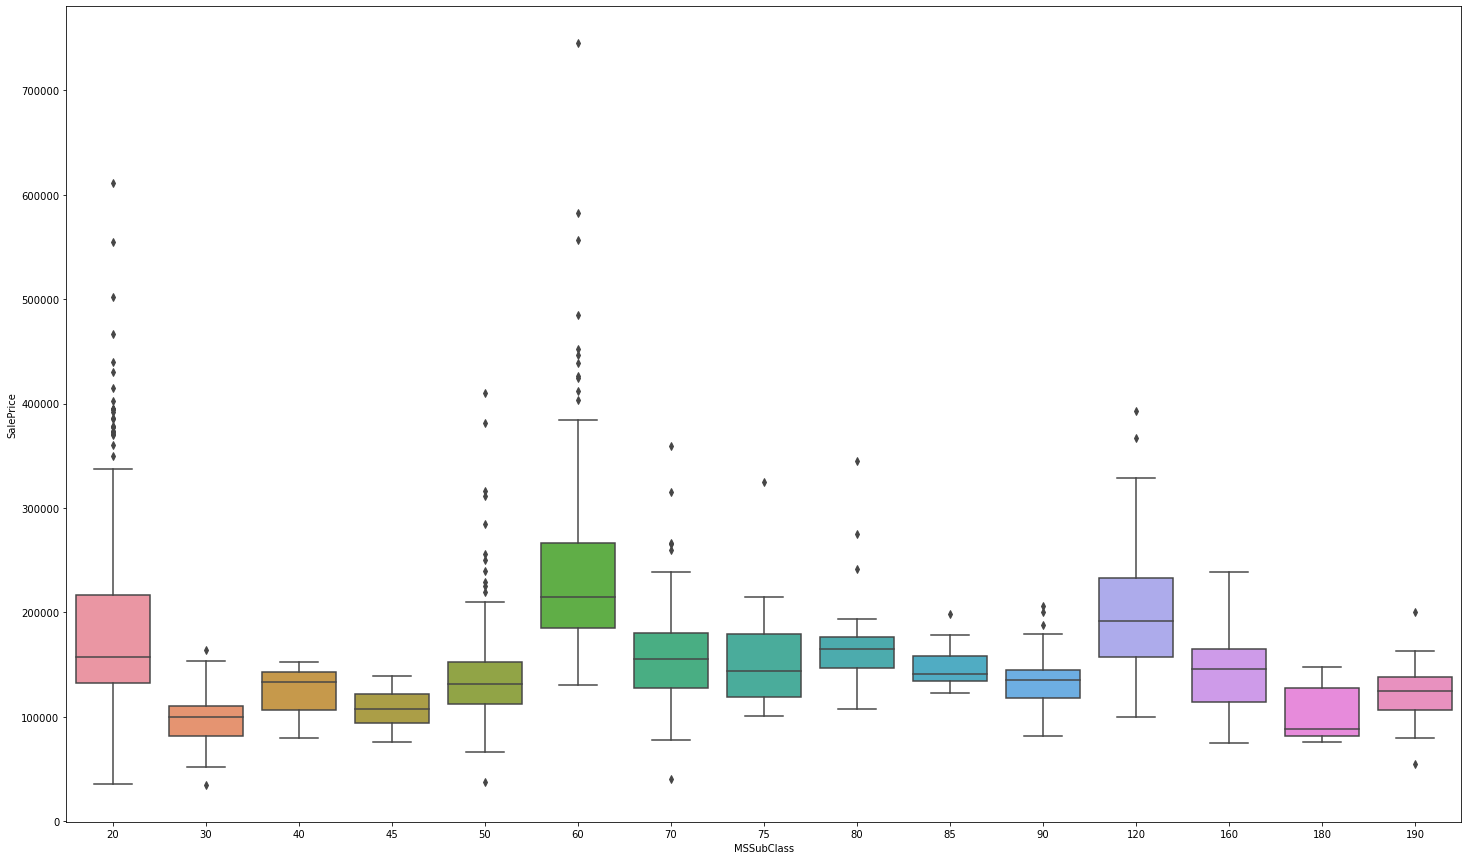

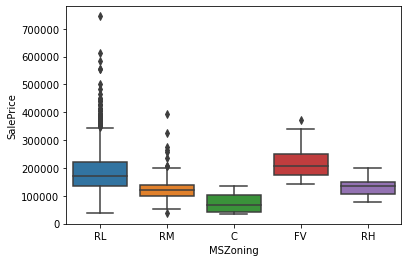

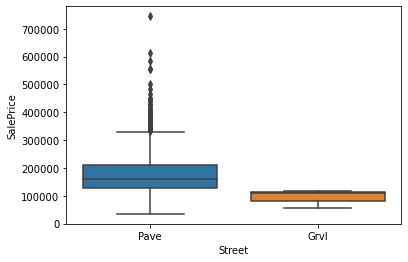

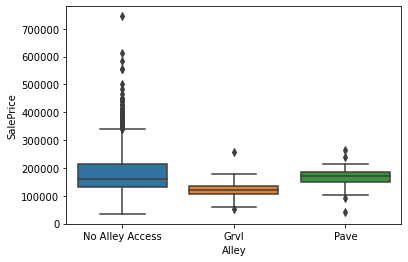

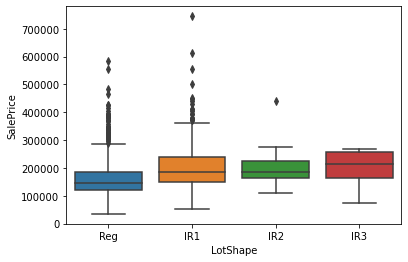

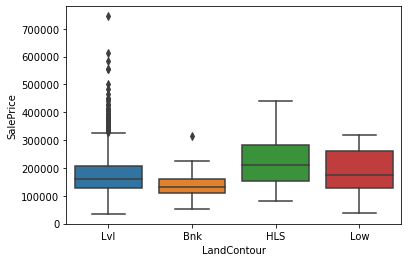

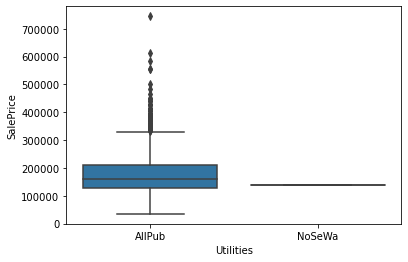

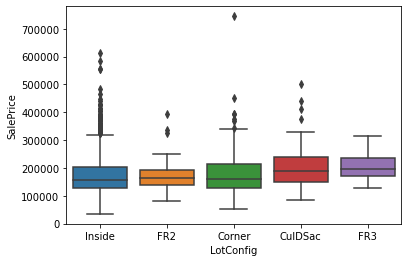

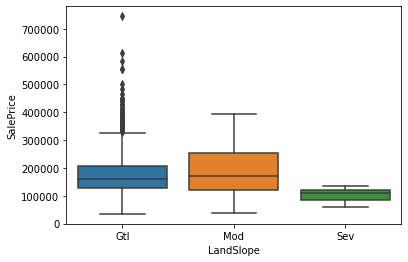

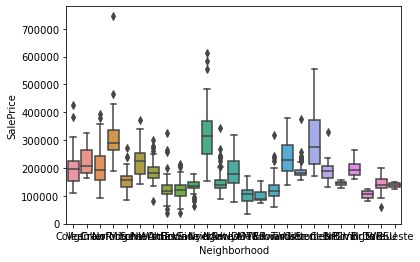

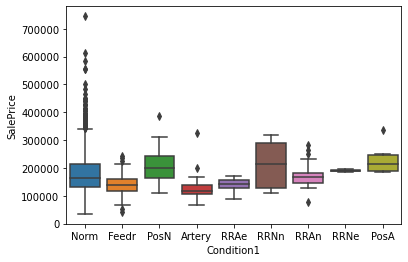

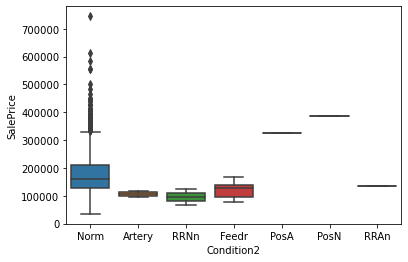

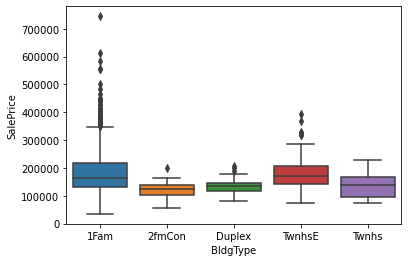

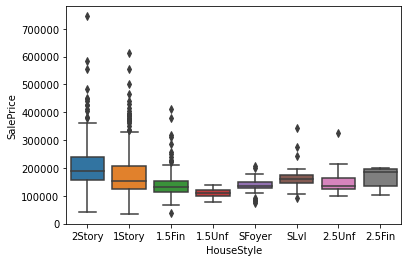

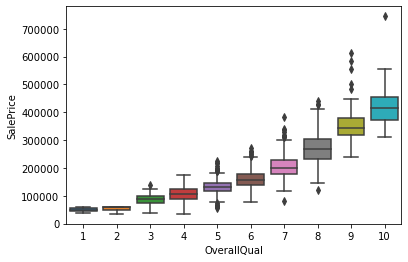

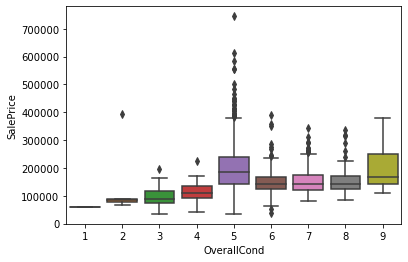

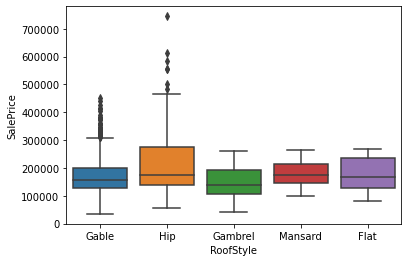

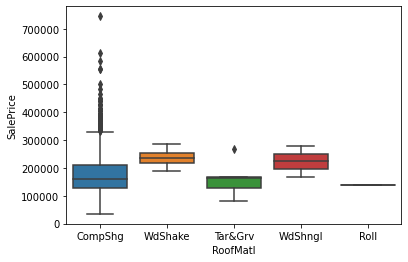

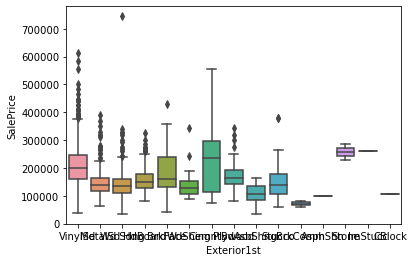

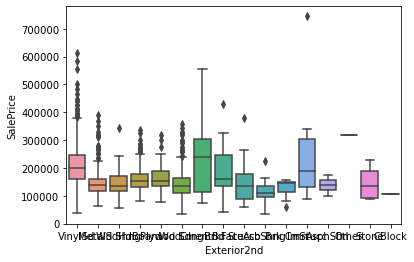

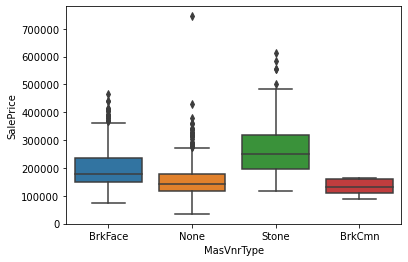

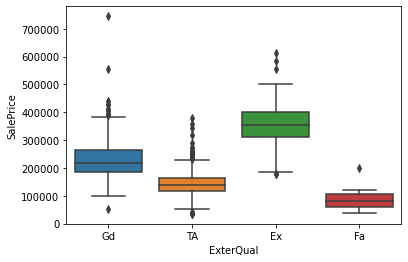

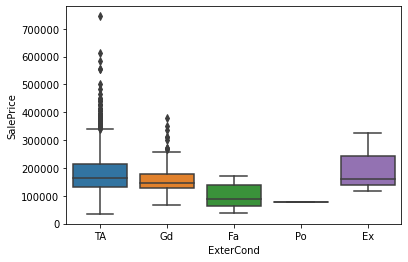

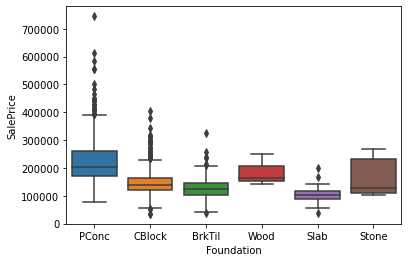

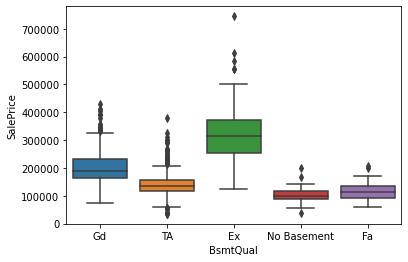

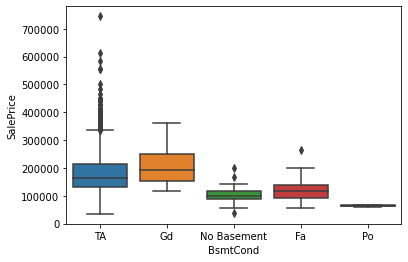

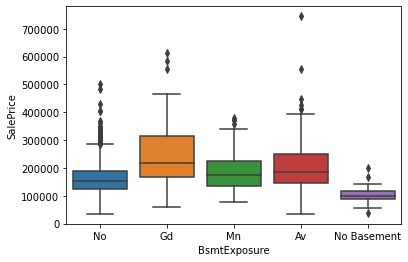

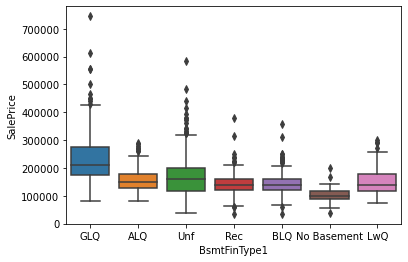

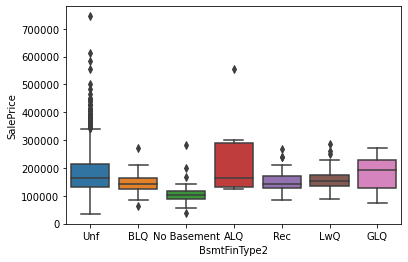

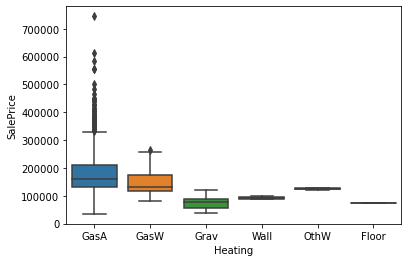

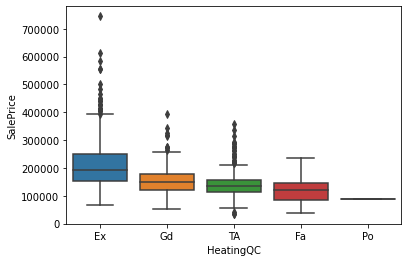

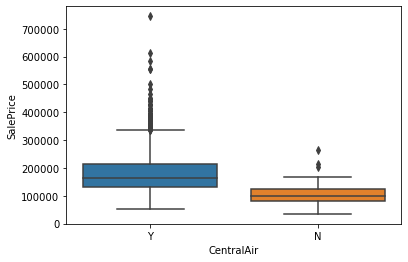

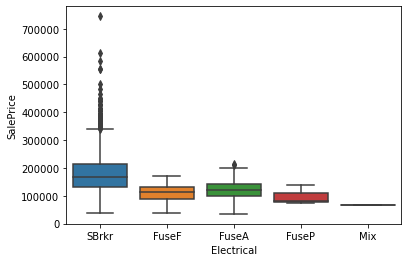

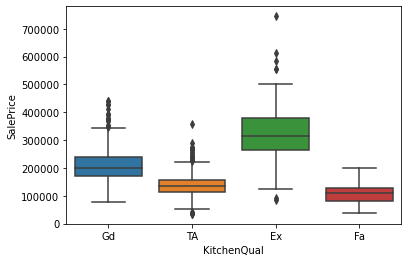

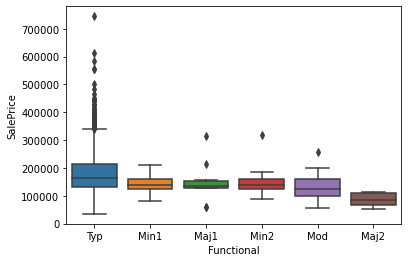

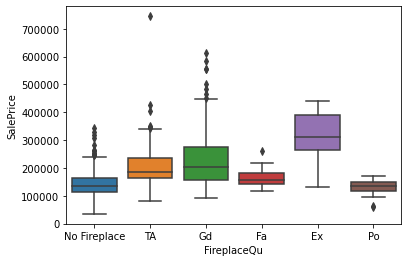

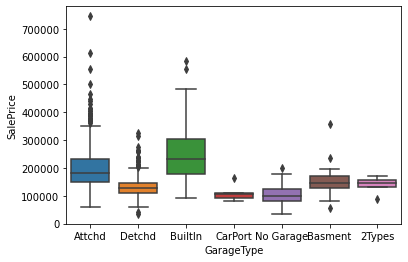

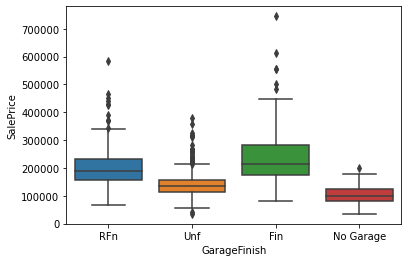

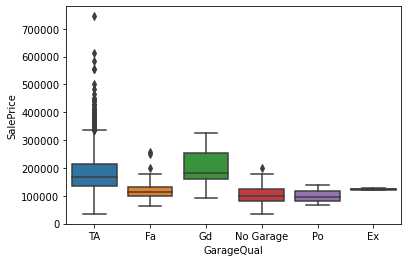

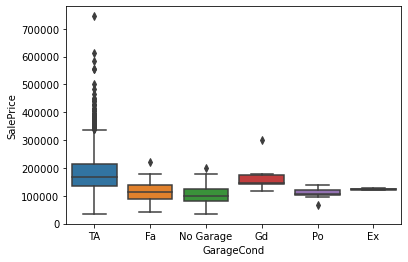

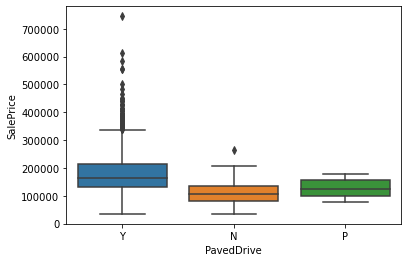

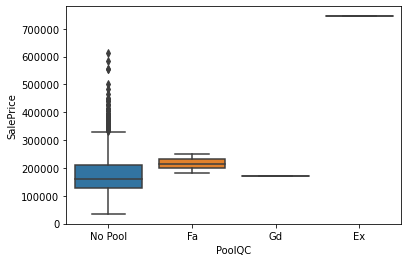

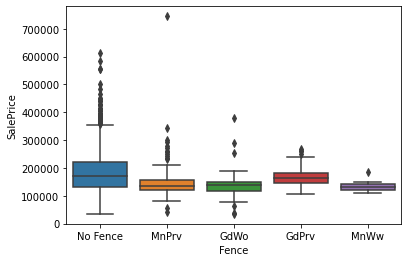

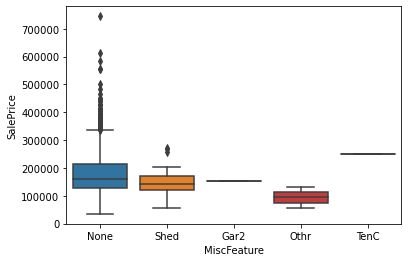

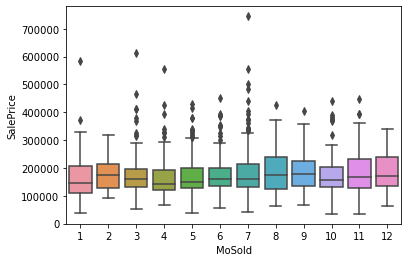

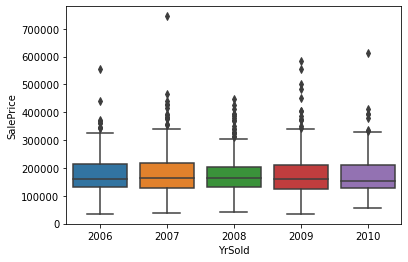

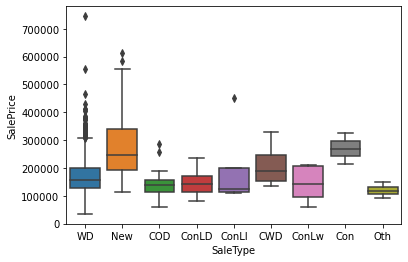

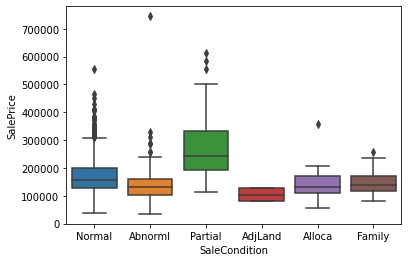

In [120]:
# Visualizing the Categorical variable using box plot
plt.figure(figsize=(25,15))

for i in housing_categorical_lst:
    sns.boxplot(x=i, y='SalePrice', data=housing_df)
    plt.show()

In [121]:
for i in housing_categorical_lst:
    print(housing_df[i].value_counts())

20     508
60     276
50     139
120     86
30      67
160     63
70      57
80      54
90      50
190     27
85      20
75      13
45      12
180     10
40       3
Name: MSSubClass, dtype: int64
RL    1082
RM     216
FV      62
RH      16
C        9
Name: MSZoning, dtype: int64
Pave    1382
Grvl       3
Name: Street, dtype: int64
No Alley Access    1295
Grvl                 50
Pave                 40
Name: Alley, dtype: int64
Reg    897
IR1    456
IR2     27
IR3      5
Name: LotShape, dtype: int64
Lvl    1267
Bnk      56
HLS      42
Low      20
Name: LandContour, dtype: int64
AllPub    1384
NoSeWa       1
Name: Utilities, dtype: int64
Inside     1010
Corner      251
CulDSac      76
FR2          44
FR3           4
Name: LotConfig, dtype: int64
Gtl    1328
Mod      54
Sev       3
Name: LandSlope, dtype: int64
NAmes      219
CollgCr    148
OldTown    111
Edwards     95
Somerst     82
NridgHt     75
Gilbert     71
Sawyer      70
NWAmes      69
SawyerW     58
BrkSide     57
Crawfor     47


In [122]:
# drop categorical variables 
housing_df = housing_df.drop(housing_categorical_lst, axis=1)

In [123]:
housing_df.head(5)

LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0         65.0     8450       196.0         706           0        150   
1         80.0     9600         0.0         978           0        284   
2         68.0    11250       162.0         486           0        434   
3         60.0     9550         0.0         216           0        540   
4         84.0    14260       350.0         655           0        490   

   TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  ...  OpenPorchSF  \
0          856       856       854             0  ...           61   
1         1262      1262         0             0  ...            0   
2          920       920       866             0  ...           42   
3          756       961       756             0  ...           35   
4         1145      1145      1053             0  ...           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  SalePrice  \
0              0          0            0         0        0     208500   
1              0          0            0         0        0     181500   
2              0          0            0         0        0     223500   
3            272          0            0         0        0     140000   
4              0          0            0         0        0     250000   

   Year_since_garageBlt  Years_since_Built  Years_since_Remodeled  
0                  19.0                 19                     19  
1                  46.0                 46                     46  
2                  21.0                 21                     20  
3                  24.0                107                     52  
4                  22.0                 22                     22  

[5 rows x 32 columns]

In [124]:
housing_continuous_lst = list(housing_df.columns)

In [125]:
housing_continuous_lst

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'SalePrice',
 'Year_since_garageBlt',
 'Years_since_Built',
 'Years_since_Remodeled']

<Figure size 3600x2160 with 0 Axes>

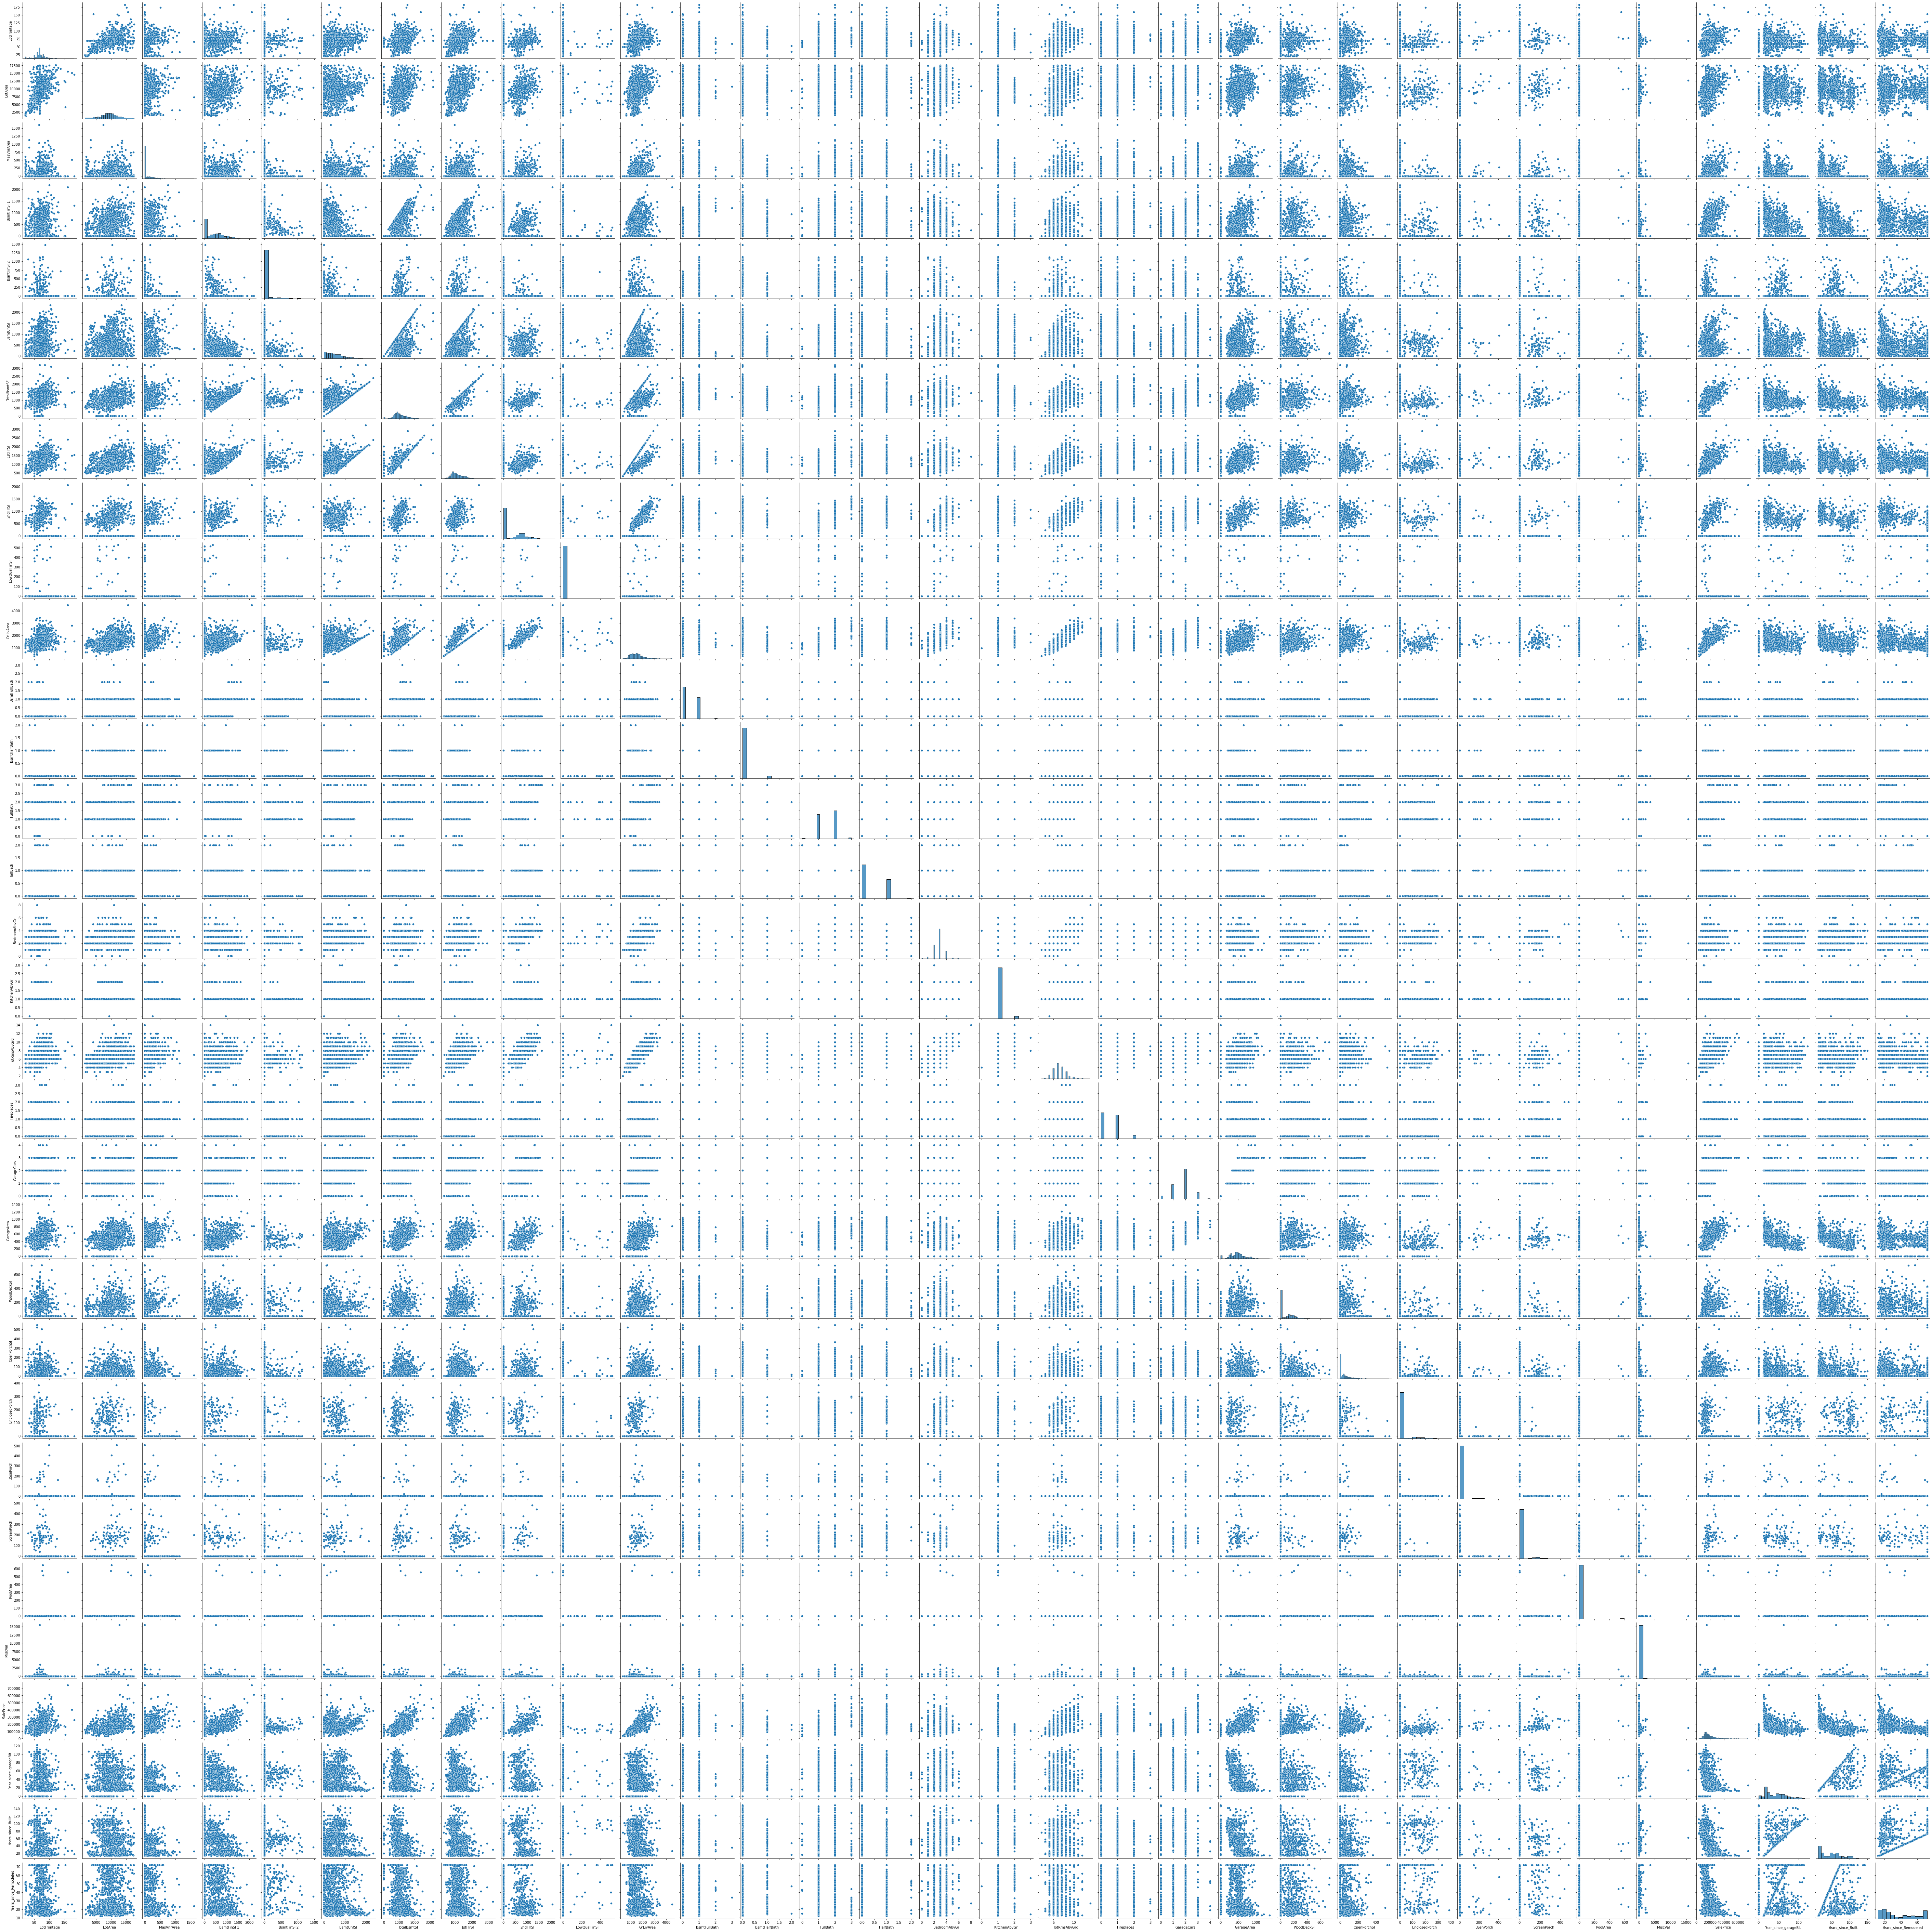

In [126]:
# Visualize the continuous variables
plt.figure(figsize=(50,30))
sns.pairplot(housing_df[housing_continuous_lst])
plt.show()

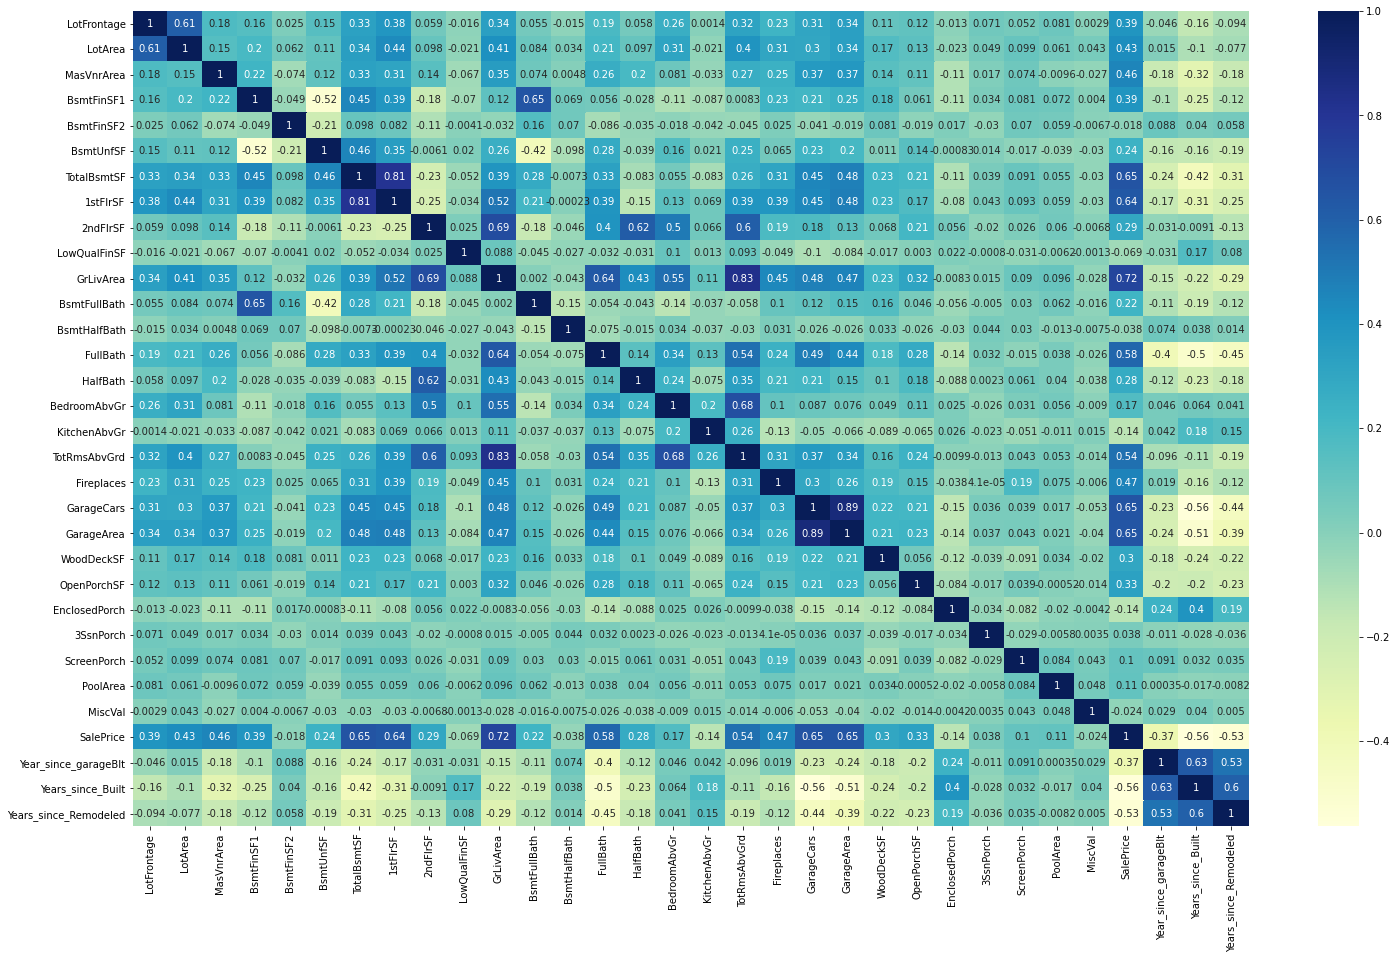

In [127]:
plt.figure(figsize=(25,15))
sns.heatmap(housing_df.corr(), cmap ='YlGnBu', annot=True)
plt.show()

In [128]:
housing_df= pd.concat([housing_df,housing_dummies],axis=1)

In [129]:
housing_df.head(5)

LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0         65.0     8450       196.0         706           0        150   
1         80.0     9600         0.0         978           0        284   
2         68.0    11250       162.0         486           0        434   
3         60.0     9550         0.0         216           0        540   
4         84.0    14260       350.0         655           0        490   

   TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  ...  SaleType_ConLw  \
0          856       856       854             0  ...               0   
1         1262      1262         0             0  ...               0   
2          920       920       866             0  ...               0   
3          756       961       756             0  ...               0   
4         1145      1145      1053             0  ...               0   

   SaleType_New  SaleType_Oth  SaleType_WD  SaleCondition_Abnorml  \
0             0             0            1                      0   
1             0             0            1                      0   
2             0             0            1                      0   
3             0             0            1                      1   
4             0             0            1                      0   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                      0                     0                     0   
1                      0                     0                     0   
2                      0                     0                     0   
3                      0                     0                     0   
4                      0                     0                     0   

   SaleCondition_Normal  SaleCondition_Partial  
0                     1                      0  
1                     1                      0  
2                     1                      0  
3                     0                      0  
4                     1                      0  

[5 rows x 343 columns]

## Split into the Train and Test Dataset

In [130]:
from sklearn.model_selection import train_test_split
housing_df_train, housing_df_test = train_test_split(housing_df, train_size=0.7, test_size=0.3, random_state=100)

In [131]:
print(housing_df_train.shape)

(969, 343)


In [132]:
print(housing_df_test.shape)

(416, 343)


In [133]:
housing_df_train.head()

LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
564          69.0    13346         0.0         728           0        367   
1034         50.0     6305         0.0           0           0        920   
511          40.0     6792        94.0           0           0       1368   
525          62.0     7500         0.0           0           0       1257   
1073         75.0     7950       140.0         535           0        155   

      TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  ...  SaleType_ConLw  \
564          1095      1166      1129             0  ...               0   
1034          920       954         0             0  ...               0   
511          1368      1368         0             0  ...               0   
525          1257      1266         0             0  ...               0   
1073          690       698       728             0  ...               0   

      SaleType_New  SaleType_Oth  SaleType_WD  SaleCondition_Abnorml  \
564              0             0            1                      0   
1034             0             0            1                      0   
511              1             0            0                      0   
525              0             0            1                      0   
1073             0             0            1                      0   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
564                       0                     0                     0   
1034                      0                     0                     0   
511                       0                     0                     0   
525                       0                     0                     0   
1073                      0                     0                     0   

      SaleCondition_Normal  SaleCondition_Partial  
564                      1                      0  
1034                     1                      0  
511                      0                      1  
525                      1                      0  
1073                     1                      0  

[5 rows x 343 columns]

## Rescalling the features

In [134]:
# Instantiate an obj
scaler = MinMaxScaler()

In [135]:
housing_df_train[housing_continuous_lst] = scaler.fit_transform(housing_df_train[housing_continuous_lst])

In [136]:
housing_df_train.head()

LotFrontage   LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
564      0.366412  0.739018     0.00000    0.332724         0.0   0.170460   
1034     0.221374  0.307055     0.00000    0.000000         0.0   0.427311   
511      0.145038  0.336933     0.05875    0.000000         0.0   0.635392   
525      0.312977  0.380368     0.00000    0.000000         0.0   0.583837   
1073     0.412214  0.407975     0.08750    0.244516         0.0   0.071993   

      TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  ...  SaleType_ConLw  \
564      0.341547  0.379909  0.700807           0.0  ...               0   
1034     0.286962  0.283105  0.000000           0.0  ...               0   
511      0.426700  0.472146  0.000000           0.0  ...               0   
525      0.392077  0.425571  0.000000           0.0  ...               0   
1073     0.215221  0.166210  0.451893           0.0  ...               0   

      SaleType_New  SaleType_Oth  SaleType_WD  SaleCondition_Abnorml  \
564              0             0            1                      0   
1034             0             0            1                      0   
511              1             0            0                      0   
525              0             0            1                      0   
1073             0             0            1                      0   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
564                       0                     0                     0   
1034                      0                     0                     0   
511                       0                     0                     0   
525                       0                     0                     0   
1073                      0                     0                     0   

      SaleCondition_Normal  SaleCondition_Partial  
564                      1                      0  
1034                     1                      0  
511                      0                      1  
525                      1                      0  
1073                     1                      0  

[5 rows x 343 columns]

In [137]:
housing_df_train.describe()

LotFrontage     LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
count   969.000000  969.000000  969.000000  969.000000  969.000000   
mean      0.363773    0.488449    0.063390    0.191386    0.032051   
std       0.142822    0.197142    0.108748    0.191564    0.110526   
min       0.000000    0.000000    0.000000    0.000000    0.000000   
25%       0.297710    0.377239    0.000000    0.000000    0.000000   
50%       0.366412    0.493865    0.000000    0.164534    0.000000   
75%       0.435115    0.607791    0.101875    0.313071    0.000000   
max       1.000000    1.000000    1.000000    1.000000    1.000000   

        BsmtUnfSF  TotalBsmtSF    1stFlrSF    2ndFlrSF  LowQualFinSF  ...  \
count  969.000000   969.000000  969.000000  969.000000    969.000000  ...   
mean     0.266231     0.324140    0.369502    0.209877      0.008530  ...   
std      0.207343     0.127732    0.162556    0.260660      0.080442  ...   
min      0.000000     0.000000    0.000000    0.000000      0.000000  ...   
25%      0.104505     0.247973    0.250228    0.000000      0.000000  ...   
50%      0.225267     0.304117    0.336986    0.000000      0.000000  ...   
75%      0.376219     0.395508    0.468493    0.446927      0.000000  ...   
max      1.000000     1.000000    1.000000    1.000000      1.000000  ...   

       SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
count      969.000000    969.000000    969.000000   969.000000   
mean         0.004128      0.083591      0.002064     0.866873   
std          0.064150      0.276917      0.045408     0.339887   
min          0.000000      0.000000      0.000000     0.000000   
25%          0.000000      0.000000      0.000000     1.000000   
50%          0.000000      0.000000      0.000000     1.000000   
75%          0.000000      0.000000      0.000000     1.000000   
max          1.000000      1.000000      1.000000     1.000000   

       SaleCondition_Abnorml  SaleCondition_AdjLand  SaleCondition_Alloca  \
count             969.000000             969.000000            969.000000   
mean                0.066047               0.004128              0.007224   
std                 0.248493               0.064150              0.084730   
min                 0.000000               0.000000              0.000000   
25%                 0.000000               0.000000              0.000000   
50%                 0.000000               0.000000              0.000000   
75%                 0.000000               0.000000              0.000000   
max                 1.000000               1.000000              1.000000   

       SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  
count            969.000000            969.000000             969.000000  
mean               0.011352              0.826625               0.084623  
std                0.105994              0.378766               0.278464  
min                0.000000              0.000000               0.000000  
25%                0.000000              1.000000               0.000000  
50%                0.000000              1.000000               0.000000  
75%                0.000000              1.000000               0.000000  
max                1.000000              1.000000               1.000000  

[8 rows x 343 columns]

## Training the Model

In [138]:
y_train = housing_df_train.pop('SalePrice')
X_train = housing_df_train

In [139]:
y_train.head()

564     0.404156
1034    0.147116
511     0.290876
525     0.244644
1073    0.216036
Name: SalePrice, dtype: float64

In [140]:
X_train.head(5)

LotFrontage   LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
564      0.366412  0.739018     0.00000    0.332724         0.0   0.170460   
1034     0.221374  0.307055     0.00000    0.000000         0.0   0.427311   
511      0.145038  0.336933     0.05875    0.000000         0.0   0.635392   
525      0.312977  0.380368     0.00000    0.000000         0.0   0.583837   
1073     0.412214  0.407975     0.08750    0.244516         0.0   0.071993   

      TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  ...  SaleType_ConLw  \
564      0.341547  0.379909  0.700807           0.0  ...               0   
1034     0.286962  0.283105  0.000000           0.0  ...               0   
511      0.426700  0.472146  0.000000           0.0  ...               0   
525      0.392077  0.425571  0.000000           0.0  ...               0   
1073     0.215221  0.166210  0.451893           0.0  ...               0   

      SaleType_New  SaleType_Oth  SaleType_WD  SaleCondition_Abnorml  \
564              0             0            1                      0   
1034             0             0            1                      0   
511              1             0            0                      0   
525              0             0            1                      0   
1073             0             0            1                      0   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
564                       0                     0                     0   
1034                      0                     0                     0   
511                       0                     0                     0   
525                       0                     0                     0   
1073                      0                     0                     0   

      SaleCondition_Normal  SaleCondition_Partial  
564                      1                      0  
1034                     1                      0  
511                      0                      1  
525                      1                      0  
1073                     1                      0  

[5 rows x 342 columns]

In [141]:
cols = X_train.columns

## Linear Regression Model

In [142]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [143]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

-59969027203.228676
[-8.70929845e-04  3.83627287e-02  1.38163417e-02  1.12874369e+10
  7.60405938e+09  1.11068791e+10 -1.65390871e+10  2.14625874e+10
  1.57882321e+10  5.17454161e+09 -3.05082349e+10 -2.54178047e-03
 -3.12912464e-03  3.61282825e-02  1.69897079e-02 -2.44530439e-02
 -9.23014879e-02  1.49543285e-02  2.02226639e-02  1.30891800e-02
  2.31006145e-02  6.03544712e-03  1.07765570e-02  9.44375992e-03
  2.17268467e-02  4.21307087e-02  7.64975630e+09  1.65399909e-03
 -1.43461227e-02 -1.08089566e-01 -1.00374222e-02  1.04469623e+10
  1.04469623e+10  1.04469623e+10  1.04469623e+10  1.04469623e+10
  1.04469623e+10  1.04469623e+10  1.04469623e+10  1.04469623e+10
  1.04469623e+10  9.46750006e+09  1.04469623e+10  1.04469623e+10
  1.04469623e+10  1.04469623e+10 -1.45355345e+10 -1.45355345e+10
 -1.45355345e+10 -1.45355345e+10 -1.45355345e+10 -6.65692170e+06
 -6.65692171e+06  8.91247633e+09  8.91247633e+09  8.91247633e+09
 -4.00340086e+09 -4.00340086e+09 -4.00340086e+09 -4.00340086e+09
  7.9

In [144]:
housing_df_test[housing_continuous_lst] = scaler.transform(housing_df_test[housing_continuous_lst])

In [145]:
housing_df_test.head()

LotFrontage   LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
346      0.366412  0.703804    0.000000    0.227605         0.0   0.213655   
969      0.412214  0.557178    0.065625    0.234461         0.0   0.034835   
1020     0.297710  0.351166    0.000000    0.468007         0.0   0.050163   
458      0.366412  0.233129    0.000000    0.000000         0.0   0.273107   
839      0.374046  0.642147    0.000000    0.160878         0.0   0.193219   

      TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  ...  SaleType_ConLw  \
346      0.298815  0.284932  0.000000           0.0  ...               0   
969      0.183406  0.347489  0.000000           0.0  ...               0   
1020     0.353088  0.364384  0.000000           0.0  ...               0   
458      0.183406  0.227854  0.517070           0.0  ...               0   
839      0.239551  0.198174  0.268156           0.0  ...               0   

      SaleType_New  SaleType_Oth  SaleType_WD  SaleCondition_Abnorml  \
346              0             0            1                      0   
969              0             0            0                      0   
1020             0             0            1                      0   
458              0             0            1                      0   
839              0             0            1                      0   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
346                       0                     0                     0   
969                       0                     0                     0   
1020                      0                     0                     0   
458                       0                     0                     0   
839                       0                     0                     0   

      SaleCondition_Normal  SaleCondition_Partial  
346                      1                      0  
969                      1                      0  
1020                     1                      0  
458                      1                      0  
839                      1                      0  

[5 rows x 343 columns]

In [146]:
y_test = housing_df_test.pop('SalePrice')
X_test = housing_df_test

In [147]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)

print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.9475143482101926
-9.475429231362517e+18
0.842566876908104
7.3017791729671815e+19
0.000869522060792677
1.755235378117111e+17


#### From the Above observation, it is evident that the test R2 score reduced too much due to overfitting since we used all the variables for modelling. So we are going to try the Ridge and Lasso regression for Regularization.

## Ridge Regression

In [148]:
# list of alphas to tune the model
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 41 candidates, totalling 205 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 30,
                                   40, 50, 60, 70, 80, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [149]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 5.0}


In [150]:
#Fitting the Ridge model for alpha = 5 and printing coefficients which have been penalised
alpha = 5
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 3.21261254e-03  3.91239630e-02  2.03288088e-02  6.32933574e-02
  1.83689548e-02  1.46703677e-02  6.14931400e-02  8.04572176e-02
  4.23394434e-02 -3.39717775e-03  7.79365371e-02  3.72425489e-03
 -1.69277320e-03  3.96653243e-02  1.95858245e-02 -4.65568629e-03
 -1.95633600e-02  3.27223716e-02  2.16745479e-02  2.16393325e-02
  2.69138168e-02  7.16751723e-03  1.22692372e-02  2.64802467e-03
  6.27627793e-03  2.29925579e-02  1.74981399e-03 -1.31173920e-03
 -6.02884717e-03 -3.30561149e-02 -1.76261214e-02  6.39175058e-03
 -1.11132724e-05  5.24974739e-03  5.85458601e-03 -3.44423656e-03
  9.82997804e-03  7.41204064e-03  1.26332770e-03  6.77594723e-04
 -8.50977956e-03 -6.55339580e-03 -1.56748794e-03 -8.46965941e-03
 -1.57426718e-03 -6.54908535e-03 -1.47620193e-02  1.36069497e-02
  9.02912484e-03 -1.00214901e-04 -7.77384033e-03  3.63999530e-03
 -3.63999530e-03 -2.31622102e-03 -4.01866386e-03  6.33488488e-03
  6.27429510e-04 -1.57686098e-03 -2.50311102e-03  3.45254249e-03
  3.71854115e-03  9.00443

In [151]:
# Calculating the metrices R2 score, RSS and RMSE for both Train and Test Data set.
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.9388875299011822
0.9060040239384674
0.9810556088264185
0.7243343215282807
0.0010124412887785536
0.0017411882729045209


## Lasso Regression

In [152]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 41 candidates, totalling 205 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 30,
                                   40, 50, 60, 70, 80, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [153]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


In [154]:
#Fitting Ridge model with alpha = 0.0001 and printing coefficients which have been penalised

alpha =0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0001)

In [155]:
lasso.coef_

array([-0.00000000e+00,  3.65398320e-02,  6.08190036e-03,  6.06085511e-02,
        7.05694092e-03, -0.00000000e+00,  9.25927032e-02,  1.44233383e-02,
        0.00000000e+00, -1.12248786e-02,  2.52885952e-01,  0.00000000e+00,
       -0.00000000e+00,  3.07501042e-02,  1.47669406e-02, -3.58026883e-03,
       -3.01101492e-02,  0.00000000e+00,  1.55458093e-02,  1.56734570e-02,
        2.65782393e-02,  1.17590681e-03,  5.46949568e-03,  0.00000000e+00,
        0.00000000e+00,  2.46740839e-02, -0.00000000e+00,  0.00000000e+00,
       -1.17242574e-03, -7.41633793e-02, -1.67567010e-02,  1.15166639e-04,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -1.53338591e-03,
        4.22473105e-03,  5.28901495e-04, -0.00000000e+00,  0.00000000e+00,
       -1.31406645e-03, -5.98265577e-03,  0.00000000e+00, -3.62431551e-03,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  1.24498907e-02,
        0.00000000e+00,  0.00000000e+00, -5.72043671e-03,  0.00000000e+00,
       -0.00000000e+00, -

In [156]:
# Calculating the metrices R2 score, RSS and RMSE for Lasso model using both Train and Test Data set.

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9391485896760055
0.9193247661810122
0.9768647431010569
0.6216844933250973
0.0010081163499494911
0.00149443387818533


In [157]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

Metric  Linear Regression  Ridge Regression  Lasso Regression
0  R2 Score (Train)       9.475143e-01          0.938888          0.939149
1   R2 Score (Test)      -9.475429e+18          0.906004          0.919325
2       RSS (Train)       8.425669e-01          0.981056          0.976865
3        RSS (Test)       7.301779e+19          0.724334          0.621684
4       MSE (Train)       2.948766e-02          0.031819          0.031751
5        MSE (Test)       4.189553e+08          0.041728          0.038658

## Insights from the model comparision
* From the Results, It is clear that Ridge and Lasso performing better than the Linear model when the Overfitting present.
* From the Above table, we can conclude that Lasso model gives better regularization since some of the variable might not be significant in predicting the target variable and Lasso handling that by zeroing the coefficient of those varibales which result in the feature selection.


## Observing the changes in the coefficients after regularization

In [158]:
betas = pd.DataFrame(index=cols)

In [159]:
betas.rows = cols

In [160]:
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [161]:
pd.set_option('display.max_rows', None)
betas.head(300)

Linear     Ridge     Lasso
LotFrontage              -8.709298e-04  0.003213 -0.000000
LotArea                   3.836273e-02  0.039124  0.036540
MasVnrArea                1.381634e-02  0.020329  0.006082
BsmtFinSF1                1.128744e+10  0.063293  0.060609
BsmtFinSF2                7.604059e+09  0.018369  0.007057
BsmtUnfSF                 1.110688e+10  0.014670 -0.000000
TotalBsmtSF              -1.653909e+10  0.061493  0.092593
1stFlrSF                  2.146259e+10  0.080457  0.014423
2ndFlrSF                  1.578823e+10  0.042339  0.000000
LowQualFinSF              5.174542e+09 -0.003397 -0.011225
GrLivArea                -3.050823e+10  0.077937  0.252886
BsmtFullBath             -2.541780e-03  0.003724  0.000000
BsmtHalfBath             -3.129125e-03 -0.001693 -0.000000
FullBath                  3.612828e-02  0.039665  0.030750
HalfBath                  1.698971e-02  0.019586  0.014767
BedroomAbvGr             -2.445304e-02 -0.004656 -0.003580
KitchenAbvGr             -9.230149e-02 -0.019563 -0.030110
TotRmsAbvGrd              1.495433e-02  0.032722  0.000000
Fireplaces                2.022266e-02  0.021675  0.015546
GarageCars                1.308918e-02  0.021639  0.015673
GarageArea                2.310061e-02  0.026914  0.026578
WoodDeckSF                6.035447e-03  0.007168  0.001176
OpenPorchSF               1.077656e-02  0.012269  0.005469
EnclosedPorch             9.443760e-03  0.002648  0.000000
3SsnPorch                 2.172685e-02  0.006276  0.000000
ScreenPorch               4.213071e-02  0.022993  0.024674
PoolArea                  7.649756e+09  0.001750 -0.000000
MiscVal                   1.653999e-03 -0.001312  0.000000
Year_since_garageBlt     -1.434612e-02 -0.006029 -0.001172
Years_since_Built        -1.080896e-01 -0.033056 -0.074163
Years_since_Remodeled    -1.003742e-02 -0.017626 -0.016757
MSSubClass_20             1.044696e+10  0.006392  0.000115
MSSubClass_30             1.044696e+10 -0.000011 -0.000000
MSSubClass_40             1.044696e+10  0.005250  0.000000
MSSubClass_45             1.044696e+10  0.005855  0.000000
MSSubClass_50             1.044696e+10 -0.003444 -0.001533
MSSubClass_60             1.044696e+10  0.009830  0.004225
MSSubClass_70             1.044696e+10  0.007412  0.000529
MSSubClass_75             1.044696e+10  0.001263 -0.000000
MSSubClass_80             1.044696e+10  0.000678  0.000000
MSSubClass_85             1.044696e+10 -0.008510 -0.001314
MSSubClass_90             9.467500e+09 -0.006553 -0.005983
MSSubClass_120            1.044696e+10 -0.001567  0.000000
MSSubClass_160            1.044696e+10 -0.008470 -0.003624
MSSubClass_180            1.044696e+10 -0.001574 -0.000000
MSSubClass_190            1.044696e+10 -0.006549  0.000000
MSZoning_C               -1.453553e+10 -0.014762 -0.000000
MSZoning_FV              -1.453553e+10  0.013607  0.012450
MSZoning_RH              -1.453553e+10  0.009029  0.000000
MSZoning_RL              -1.453553e+10 -0.000100  0.000000
MSZoning_RM              -1.453553e+10 -0.007774 -0.005720
Street_Grvl              -6.656922e+06  0.003640  0.000000
Street_Pave              -6.656922e+06 -0.003640 -0.000000
Alley_Grvl                8.912476e+09 -0.002316 -0.000000
Alley_No Alley Access     8.912476e+09 -0.004019 -0.000000
Alley_Pave                8.912476e+09  0.006335  0.003825
LotShape_IR1             -4.003401e+09  0.000627 -0.000000
LotShape_IR2             -4.003401e+09 -0.001577 -0.000000
LotShape_IR3             -4.003401e+09 -0.002503 -0.000000
LotShape_Reg             -4.003401e+09  0.003453  0.001760
LandContour_Bnk           7.925040e+09  0.003719  0.000000
LandContour_HLS           7.925040e+09  0.009004  0.000000
LandContour_Low           7.925040e+09 -0.014879 -0.014717
LandContour_Lvl           7.925040e+09  0.002156 -0.000000
Utilities_AllPub         -7.034361e+08  0.005301  0.000000
Utilities_NoSeWa         -7.034361e+08 -0.005301 -0.000000
LotConfig_Corner          6.661964e+09  0.000112  0.000000
LotConfig_CulDSac   

In [162]:
betas[betas['Lasso']!=0].shape[0]

146

In [163]:
betas[betas['Lasso']!=0]['Lasso'].sort_values(ascending=False)

GrLivArea                   0.252886
OverallQual_9               0.099431
OverallQual_10              0.093833
TotalBsmtSF                 0.092593
Neighborhood_StoneBr        0.069231
BsmtFinSF1                  0.060609
Neighborhood_Crawfor        0.048653
OverallQual_8               0.039984
LotArea                     0.036540
SaleCondition_Partial       0.032361
FullBath                    0.030750
BsmtExposure_Gd             0.030715
Neighborhood_NoRidge        0.027996
OverallCond_9               0.027397
Functional_Typ              0.027248
ExterQual_Ex                0.026656
GarageArea                  0.026578
Exterior1st_BrkFace         0.025825
BldgType_1Fam               0.024806
ScreenPorch                 0.024674
KitchenQual_Ex              0.023972
BsmtFinType2_ALQ            0.023044
Neighborhood_NridgHt        0.022942
OverallCond_8               0.020936
OverallCond_7               0.019185
MasVnrType_Stone            0.017575
Neighborhood_NPkVill        0.015964
G

#### From the Beta values of Lasso Regression, 
1. GrLivArea(Above grade (ground) living area square feet)
2. OverallQual_9 (the overall material and finish of the house which is Excellent)
3. OverallQual_10 (the overall material and finish of the house which is Very Excellent)
4. TotalBsmtSF (Total basement area in Square feet)
5. Years_since_Built ( Which is a derived metrics, No of years since the property built)

This are the 5 most important significant variables. In this, Years_since_Built variable is negatively affecting the target varibale with negative coefficient value.

In [164]:
betas[betas['Ridge']!=0]['Ridge'].sort_values(ascending=False)

1stFlrSF                    0.080457
GrLivArea                   0.077937
BsmtFinSF1                  0.063293
TotalBsmtSF                 0.061493
OverallQual_9               0.056975
Neighborhood_StoneBr        0.055655
2ndFlrSF                    0.042339
FullBath                    0.039665
LotArea                     0.039124
OverallQual_10              0.037799
Neighborhood_Crawfor        0.034767
TotRmsAbvGrd                0.032722
GarageArea                  0.026914
Neighborhood_NoRidge        0.026844
BsmtExposure_Gd             0.026416
ExterQual_Ex                0.026135
ScreenPorch                 0.022993
KitchenQual_Ex              0.022883
Fireplaces                  0.021675
GarageCars                  0.021639
MasVnrArea                  0.020329
Neighborhood_NridgHt        0.020047
Exterior1st_BrkFace         0.019641
HalfBath                    0.019586
Functional_Typ              0.019211
BsmtFinType2_ALQ            0.019010
OverallQual_8               0.018923
B

#### From the beta value of Ridge model,
1. 1stFlrSF (First Floor square feet)
2. GrLivArea (Above grade (ground) living area square feet)
3. BsmtFinSF1 (Type 1 Basement finished square feet)
4. TotalBsmtSF (Total square feet of basement area)
5. OverallQual_9 (the overall material and finish of the house which is Excellent)

Theses are the top 5 significant Independent variables in explaining the target variable.

## The Below codes are for Subjective questions Assignment

Trying the Ridge and Lasso with Double the Alpha Value

In [165]:
#Fitting the Ridge model for alpha = 10
alpha = 10
ridge_2 = Ridge(alpha=alpha)

ridge_2.fit(X_train, y_train)
print(ridge_2.coef_)

[ 5.11758442e-03  3.73966226e-02  1.92602526e-02  5.13640930e-02
  1.35156553e-02  1.36946047e-02  5.04651264e-02  6.79987785e-02
  3.51484132e-02 -3.58670855e-03  6.54184505e-02  6.21855718e-03
 -1.37826740e-03  3.68939655e-02  1.88727931e-02  1.15930101e-03
 -1.12777708e-02  3.40797784e-02  1.99107548e-02  2.30836206e-02
  2.67219631e-02  7.52807335e-03  1.23779700e-02  2.03714186e-03
  3.85710439e-03  1.83116364e-02  1.03232605e-03 -6.74708755e-04
 -5.65041004e-03 -2.01366089e-02 -1.91866120e-02  6.05457810e-03
 -3.28639586e-03  2.74980356e-03  4.03242556e-03 -1.30546225e-03
  9.82946461e-03  6.83981707e-03  2.31229046e-03  2.35631338e-05
 -7.11325739e-03 -4.74425332e-03 -2.25862895e-03 -6.56582805e-03
 -1.79632093e-03 -4.77179575e-03 -1.04827800e-02  1.01939096e-02
  7.29729654e-03  9.24753266e-04 -7.93317936e-03  1.70762713e-03
 -1.70762713e-03 -2.41764785e-03 -3.64174521e-03  6.05939306e-03
  2.30615193e-04 -1.31150833e-03 -1.08074709e-03  2.16164023e-03
  1.93864349e-03  7.29683

In [166]:
# Calculating the metrices R2 score, RSS and RMSE for both Train and Test Data set with new Ridge Model.
y_pred_train = ridge_2.predict(X_train)
y_pred_test = ridge_2.predict(X_test)

metric4 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric4.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric4.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric4.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric4.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric4.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric4.append(mse_test_lr**0.5)

0.9320388649804243
0.8985572840557391
1.090999146088418
0.781719004432393
0.001125902111546355
0.0018791322221932522


In [167]:
#Fitting Ridge model with alpha = 0.0002 and printing coefficients which have been penalised

alpha =0.0002

lasso_2 = Lasso(alpha=alpha)
        
lasso_2.fit(X_train, y_train) 
print(lasso_2.coef_)

[-0.00000000e+00  3.11331536e-02  2.17848999e-03  5.69426678e-02
  0.00000000e+00 -0.00000000e+00  8.08890198e-02  1.71896431e-02
  0.00000000e+00 -0.00000000e+00  2.46690507e-01  0.00000000e+00
 -0.00000000e+00  2.47589116e-02  1.29193402e-02 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00  1.06581538e-02  1.62074371e-02
  2.98432629e-02  0.00000000e+00  7.00737762e-04  0.00000000e+00
  0.00000000e+00  1.79101717e-02 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -5.84297198e-02 -2.17900048e-02  7.15171988e-04
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  5.40289011e-03  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -6.11542148e-03  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00  1.02118151e-02
  0.00000000e+00  0.00000000e+00 -4.39562259e-03  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00  8.61162286e-04
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000

In [168]:
# Calculating the metrices R2 score, RSS and RMSE for Lasso model using both Train and Test Data set for New Lasso Model.

y_pred_train = lasso_2.predict(X_train)
y_pred_test = lasso_2.predict(X_test)

metric5 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric5.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric5.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric5.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric5.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric5.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric5.append(mse_test_lr**0.5)

0.9323308251880723
0.916532963223083
1.0863122270552974
0.6431981664215777
0.0011210652497990684
0.0015461494385134078


In [169]:
rg_2_metric = pd.Series(metric4, name = 'Ridge Regression 2')
ls_2_metric = pd.Series(metric5, name = 'Lasso Regression 2')

In [170]:
final_metric = pd.concat([final_metric, rg_2_metric, ls_2_metric], axis=1)
final_metric

Metric  Linear Regression  Ridge Regression  Lasso Regression  \
0  R2 Score (Train)       9.475143e-01          0.938888          0.939149   
1   R2 Score (Test)      -9.475429e+18          0.906004          0.919325   
2       RSS (Train)       8.425669e-01          0.981056          0.976865   
3        RSS (Test)       7.301779e+19          0.724334          0.621684   
4       MSE (Train)       2.948766e-02          0.031819          0.031751   
5        MSE (Test)       4.189553e+08          0.041728          0.038658   

   Ridge Regression 2  Lasso Regression 2  
0            0.932039            0.932331  
1            0.898557            0.916533  
2            1.090999            1.086312  
3            0.781719            0.643198  
4            0.033554            0.033482  
5            0.043349            0.039321

In [171]:
betas['Ridge_2'] = ridge_2.coef_
betas['Lasso_2'] = lasso_2.coef_

In [172]:
betas[betas['Ridge_2']!=0]['Ridge_2'].sort_values(ascending=False)

1stFlrSF                    0.067999
GrLivArea                   0.065418
BsmtFinSF1                  0.051364
TotalBsmtSF                 0.050465
OverallQual_9               0.049454
Neighborhood_StoneBr        0.045455
LotArea                     0.037397
FullBath                    0.036894
2ndFlrSF                    0.035148
TotRmsAbvGrd                0.034080
Neighborhood_Crawfor        0.030553
ExterQual_Ex                0.028852
OverallQual_10              0.027722
GarageArea                  0.026722
BsmtExposure_Gd             0.026525
KitchenQual_Ex              0.025226
Neighborhood_NoRidge        0.024740
GarageCars                  0.023084
OverallQual_8               0.021557
BsmtQual_Ex                 0.020957
Neighborhood_NridgHt        0.020421
Fireplaces                  0.019911
MasVnrArea                  0.019260
HalfBath                    0.018873
Exterior1st_BrkFace         0.018580
ScreenPorch                 0.018312
MasVnrType_Stone            0.017044
B

In [173]:
betas[betas['Lasso_2']!=0]['Lasso_2'].sort_values(ascending=False)

GrLivArea                   2.466905e-01
OverallQual_9               9.506881e-02
TotalBsmtSF                 8.088902e-02
OverallQual_10              8.058040e-02
Neighborhood_StoneBr        6.124640e-02
BsmtFinSF1                  5.694267e-02
Neighborhood_Crawfor        4.639487e-02
OverallQual_8               4.146609e-02
SaleCondition_Partial       3.258952e-02
ExterQual_Ex                3.189044e-02
LotArea                     3.113315e-02
GarageArea                  2.984326e-02
BsmtExposure_Gd             2.966978e-02
KitchenQual_Ex              2.675943e-02
Functional_Typ              2.601782e-02
FullBath                    2.475891e-02
BldgType_1Fam               2.472620e-02
Neighborhood_NoRidge        2.398817e-02
Neighborhood_NridgHt        2.243999e-02
Exterior1st_BrkFace         2.231647e-02
ScreenPorch                 1.791017e-02
1stFlrSF                    1.718964e-02
GarageCars                  1.620744e-02
BsmtFinType2_ALQ            1.547776e-02
BsmtQual_Ex     

### After Dropping the top 5 important predictor Variable in Lasso model

In [174]:
X_train_lasso = X_train.drop(['GrLivArea', 'OverallQual_9', 'OverallQual_10', 'TotalBsmtSF', 'Years_since_Built'], axis=1)

In [175]:
lasso_3 = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso_3, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_lasso, y_train) 
print(model_cv.best_params_)


Fitting 5 folds for each of 41 candidates, totalling 205 fits
{'alpha': 0.0001}


In [176]:
#Fitting Ridge model with alpha = 0.0001 and printing coefficients which have been penalised

alpha =0.0001

lasso_3 = Lasso(alpha=alpha)
        
lasso_3.fit(X_train_lasso, y_train) 

Lasso(alpha=0.0001)

In [177]:
print(lasso_3.coef_)

[ 0.00000000e+00  3.88448285e-02  1.03768201e-02  1.00779415e-01
  3.33082027e-02  4.08378137e-02  2.09082168e-01  1.12334263e-01
  0.00000000e+00  0.00000000e+00 -0.00000000e+00  3.98789140e-02
  1.92921334e-02 -1.80189481e-03 -4.78341842e-02  2.23778718e-03
  1.82329521e-02  2.54620769e-02  2.61456671e-02  4.06690177e-03
  5.05313903e-03 -0.00000000e+00  0.00000000e+00  2.30918778e-02
 -0.00000000e+00  0.00000000e+00 -6.51783995e-03 -2.01976664e-02
  4.33758952e-03 -2.32828091e-03  0.00000000e+00  0.00000000e+00
 -0.00000000e+00  1.37272894e-02  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -1.82033583e-03 -2.50596671e-03  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -1.01376347e-02
  1.67396015e-02  0.00000000e+00  0.00000000e+00 -4.87917709e-03
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  4.04735960e-03  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  2.04065297e-03  0.00000000e+00  5.82777470e-03 -1.91910691e-02
 -0.00000000e+00  0.00000

In [180]:
col_new = X_train_lasso.columns
col_new

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=337)

In [181]:
betas_new = pd.DataFrame(index=col_new)

In [182]:
betas_new.rows = col_new

In [183]:
betas_new['Lasso_new'] = lasso_3.coef_

In [185]:
betas_new[betas_new['Lasso_new']!=0]['Lasso_new'].sort_values(ascending=False)

1stFlrSF                    2.090822e-01
2ndFlrSF                    1.123343e-01
BsmtFinSF1                  1.007794e-01
Neighborhood_StoneBr        7.553743e-02
ExterQual_Ex                4.261283e-02
BsmtUnfSF                   4.083781e-02
Neighborhood_Crawfor        4.081239e-02
FullBath                    3.987891e-02
LotArea                     3.884483e-02
KitchenQual_Ex              3.485098e-02
BsmtFinSF2                  3.330820e-02
Neighborhood_NoRidge        3.244630e-02
BsmtExposure_Gd             3.180446e-02
Neighborhood_NridgHt        3.149609e-02
SaleCondition_Partial       3.027384e-02
Functional_Typ              3.013716e-02
Exterior1st_BrkFace         2.707846e-02
GarageArea                  2.614567e-02
GarageCars                  2.546208e-02
BsmtFinType2_ALQ            2.427649e-02
ScreenPorch                 2.309188e-02
BldgType_1Fam               2.163363e-02
BsmtQual_Ex                 2.100767e-02
HalfBath                    1.929213e-02
MasVnrType_Stone